In [62]:
################################################################
## Import libraries
import os
import numpy as np
np.set_printoptions(suppress=True)
import math as math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as Ticker
import matplotlib.colors as colors
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.signal as sig
import scipy.stats as stats
import scipy.ndimage as spim
from scipy.signal import savgol_filter
import dabest as db2
import datetime
################################################################

In [2]:
import smBaseFunctions3 as sbf
import vBaseFunctions3 as vbf
import smdabest.dabest as db
from my_mpl_defaults import *

In [3]:
from IPython.core.display import display, HTML
import sys
######################################################################
display(HTML("<style>.container { width:75% !important; }</style>"))
!jt -r
sys.executable
######################################################################
plt.rcParams['svg.fonttype'] = 'none'
# Then, "ALWAYS use sans-serif fonts"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.sans-serif'] = "Arial"

mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
#######################################################################

/tmp/ipykernel_125521/1132170265.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Reset css and font defaults in:
/home/data/.jupyter/custom &
/home/data/.local/share/jupyter/nbextensions


In [4]:
################################################################
# Get database entries
################################################################
day_list = ['path_select']
group_list = ['chr2_archT']

day_type = day_list[0]
group_type = group_list[0]
old_mpath = '/mnt/smchugh/lfpd4/SF/'
update = True
################################################################
database = sbf.get_database_dl(day_type,
                               group_type,
                               old_mpath=old_mpath,
                               update=update)
################################################################

database rootdir is /Dupret_Lab/analysis/smchugh_analysis/databases
/Dupret_Lab//analysis/smchugh_analysis/databases/path_select_chr2_archT.db

0 /Dupret_Lab/merged/smchugh_merged/msm04-160720
1 /Dupret_Lab/merged/smchugh_merged/msm04-160721
2 /Dupret_Lab/merged/smchugh_merged/msm04-160722
3 /Dupret_Lab/merged/smchugh_merged/msm04-160723
4 /Dupret_Lab/merged/smchugh_merged/msm06-161024
5 /Dupret_Lab/merged/smchugh_merged/msm06-161026
6 /Dupret_Lab/merged/smchugh_merged/msm06-161102
7 /Dupret_Lab/merged/smchugh_merged/msm08-170317
8 /Dupret_Lab/merged/smchugh_merged/msm08-170322
9 /Dupret_Lab/merged/smchugh_merged/msm08-170323
10 /Dupret_Lab/merged/smchugh_merged/msm08-170324
11 /Dupret_Lab/merged/smchugh_merged/msm09-170526
12 /Dupret_Lab/merged/smchugh_merged/msm09-170529
13 /Dupret_Lab/merged/smchugh_merged/msm09-170530
14 /Dupret_Lab/merged/smchugh_merged/msm09-170531
15 /Dupret_Lab/merged/smchugh_merged/msm09-170601
16 /Dupret_Lab/merged/smchugh_merged/msm09-170605
17 /Dupret_Lab/m

In [49]:
mouseID,allBaseblock,allPar,alldesen,units = sbf.get_all_mouse_db_info(database,SF=True)
indIDs,origIDs = sbf.get_all_cell_inds(database,units,pprint=False,thresh1=200,exact=True)

p1 881

p2 0

p3 387

pdg 913

b1 96

i1 0

b3 66

bdg 241

pdgL 41

bdgL 10

bdgdL 11

p3L 0

p1L 9

b1L 4

b3L 2

p1dL 3

p3dL 10

pdgdL 2

b1dL 14

b3dL 8

p1rL 3

p3rL 9

bdgrL 20

b3rL 18

b1rL 7

pu 50

puL 3

bu 13

buL 0



In [43]:
##################################################################################################################
mpath = '/Dupret_Lab/analysis'
first_part = 'smchugh_analysis/SF_analysis'
subfolder = 'DentateSpike'
pulse_type = 'DSResponses'
dat_type = 'PSTH'
duration_type = '400ms'
##################################################################################################################
celltype = ['pdg','p3','p1','bdg','b3','b1']
ext_pt1 = celltype
ext_pt2 = '.npy'
ext_list = ['.ds_all_no_swr',
            '.swr_all_no_ds',
            '.ds1_all_no_swr',
            '.ds2_all_no_swr']
okey_list = ['ds',
             'swr',
             'ds1',
             'ds2']
##################################################################################################################
allDat = {}
for indx,(ext,okey) in enumerate(zip(ext_list,okey_list)):
    ipath = sbf.generate_ipath(group_type,
                               day_type,
                               ext,
                               mpath=mpath,
                               first_part=first_part,
                               subfolder=subfolder,
                               pulse_type=pulse_type,
                               dat_type=dat_type,
                               duration_type=duration_type)
    
    print(ipath)
    FRList = sbf.get_FRList(ipath,ext_pt1,ext_pt2)
    allDat[okey] = FRList
###################################################################################################################

/Dupret_Lab/analysis/smchugh_analysis/SF_analysis/DentateSpike/DSResponses/chr2_archT/path_select/ds_all_no_swr/PSTH/400ms

pdg.npy
_pdg.npy files are: Allcells_chr2_archT_n921_pdg.npy

p3.npy
_p3.npy files are: Allcells_chr2_archT_n388_p3.npy

p1.npy
_p1.npy files are: Allcells_chr2_archT_n887_p1.npy

bdg.npy
_bdg.npy files are: Allcells_chr2_archT_n242_bdg.npy

b3.npy
_b3.npy files are: Allcells_chr2_archT_n66_b3.npy

b1.npy
_b1.npy files are: Allcells_chr2_archT_n96_b1.npy
/Dupret_Lab/analysis/smchugh_analysis/SF_analysis/DentateSpike/DSResponses/chr2_archT/path_select/swr_all_no_ds/PSTH/400ms

pdg.npy
_pdg.npy files are: Allcells_chr2_archT_n921_pdg.npy

p3.npy
_p3.npy files are: Allcells_chr2_archT_n388_p3.npy

p1.npy
_p1.npy files are: Allcells_chr2_archT_n887_p1.npy

bdg.npy
_bdg.npy files are: Allcells_chr2_archT_n242_bdg.npy

b3.npy
_b3.npy files are: Allcells_chr2_archT_n66_b3.npy

b1.npy
_b1.npy files are: Allcells_chr2_archT_n96_b1.npy
/Dupret_Lab/analysis/smchugh_analysis/

In [44]:
###############################################################################################################
def get_ylim(ctype,group_type,pulse_type='ds'):
    '''
    
    '''
    if (group_type == 'gfp_aged') and pulse_type.startswith('ds'):
            ylim_dict = {'pdg':(0,28),'pdgL':(0,20),'p3':(0,20),'p1':(0,24),'bdg':(0,60),'b3':(0,60),'b1':(0,60) }
    elif (group_type == 'gfp_aged') and pulse_type.startswith('swr'):
        ylim_dict = {'pdg':(0,28), 'pdgL':(0,20),'p3':(0,20),'p1':(0,24),'bdg':(0,50),'b3':(0,30),'b1':(0,30) }
    elif (group_type == 'chr2_archT') and pulse_type.startswith('ds'):
            ylim_dict = {'pdg':(0,16),'pdgL':(0,20),'p3':(0,12),'p1':(0,12),'bdg':(0,60),'b3':(0,60),'b1':(0,60) }        
    elif (group_type == 'chr2_archT') and pulse_type.startswith('swr'):
        ylim_dict = {'pdg':(0,12), 'pdgL':(0,12),'p3':(0,12),'p1':(0,20),'bdg':(0,50),'b3':(0,30),'b1':(0,30) }
    elif (group_type == 'grm'):
            ylim_dict = {'pdg':(0,16),'pdgL':(0,20),'p3':(0,12),'p1':(0,12),'bdg':(0,60),'b3':(0,60),'b1':(0,60) }
    try:
        ymin,ymax = ylim_dict[ctype]
    except:
        ymin,ymax = -2,10
        print('no ylim entry')

    return ymin,ymax
###############################################################################################################
def generate_IFR(iDict,ikey_list,smooth=True,smpts=3):
    '''
    
    '''
    odata = {}
    for ikey_indx,ikey in enumerate(ikey_list):
        tempdict = np.squeeze(iDict[ikey][0])
        tempdict = sbf.inf_to_nan(tempdict)
        odata[ikey] = tempdict[:, ~np.isnan(tempdict).any(axis=0)]
        # x[:, ~np.isnan(x).any(axis=0)]
        if smooth:
            odata[ikey] = savgol_filter(odata[ikey],smpts,1,axis=0)
        
    return odata
#####################################################################################################
def generate_metric(iDict,x_range=(150,250),method=np.nansum,smooth=True):
    '''
    
    '''
    odata = {}
    for key,val in iDict.items():
        print(key,val.shape)
        odata[key] = method(val[x_range[0]:x_range[1],:],axis=0)

    return odata
######################################################################################################
def generate_z_score(allDat,celltype,smpts=None):
    '''
    '''
    odata = {}
    for ikey,val in allDat.items():
        tempdict = {}
        for cindx,ctype in enumerate(celltype):
            if smpts is not None:
                tempdat = savgol_filter(np.squeeze(val[ctype][0].copy()),smpts,1,axis=0)
            else:
                tempdat = np.squeeze(val[ctype][0].copy())
            tempdict[ctype] = stats.zscore(tempdat,axis=0)
        odata[ikey] = tempdict
        
    return odata
########################################################################################################
def generate_mean_rate(allDat,celltype,xrange=(0,150)):
    '''
    '''
    odata = {}
    for ikey,val in allDat.items():
        tempdict = {}
        for cindx,ctype in enumerate(celltype):
            tempdat = np.squeeze(val[ctype][0])
            tempdict[ctype] = np.nanmean(tempdat[xrange[0]:xrange[1]],
                                         axis=0)
        odata[ikey] = tempdict
        
    return odata
########################################################################################################
def generate_z_max(idata,xrange=(160,240),smooth=True,npts=3):
    
    odata = {}
    for ikey,val in idata.items():
        tempdict = {}
        for cindx,ctype in enumerate(celltype):
            if smooth:
                temparray = savgol_filter(val[ctype][xrange[0]:xrange[1],:],npts,1)
            else:
                temparray = val[ctype][xrange[0]:xrange[1],:]
            tempdat = np.nanmax(temparray,axis=0)
            tempdict[ctype] = tempdat
            #print(ikey,ctype,tempdict[ctype].shape)
        odata[ikey] = tempdict

    return odata
####################################################################################
def find_argmax(idata,xrange=(150,250),offset=50):
    argmax = np.argmax(np.squeeze(idata[xrange[0]:xrange[1],:]),axis=0)
    return np.array([x-offset for x in argmax])
####################################################################################
def create_argmax_dict(iDict,xrange=(180,220),offset=20):
    
    oDict = {}
    for ikey,val in iDict.items():
        tempdict = {}
        for key2,val2 in val.items():
            tempdict[key2] = find_argmax(val2,xrange=xrange,offset=offset)   
        oDict[ikey] = tempdict
        
    return oDict
#####################################################################################
def remove_nans_paired(iDict,okey_list,ikey_list=['ds','swr']):
    
    for okey_indx,okey in enumerate(okey_list):
        
        a = iDict[ikey_list[0]][okey]
        b = iDict[ikey_list[1]][okey]
        
        mask = np.logical_and(~np.isnan(a).any(axis=0),~np.isnan(b).any(axis=0))
        
        print(okey,np.squeeze(a).shape)
        iDict[ikey_list[0]][okey] = np.squeeze(a[:,mask])
        iDict[ikey_list[1]][okey] = np.squeeze(b[:,mask])

    return iDict
#####################################################################################
def remove_non_sig(iDict,iDict_z,z_thresh=3):
    
    oDict = {}
    for ikey,val in iDict.items():
        tempdict = {}
        for key2,val2 in val.items():
            ref2 = iDict_z[ikey][key2]
            tempdict[key2] = val2[ref2 > z_thresh]
        oDict[ikey] = tempdict
  
    return oDict
####################################################################################
def bin_array(idata, axis=0, binstep=10, binsize=10, func=np.nanmean):
    
    idata = np.array(idata)
    dims = np.array(idata.shape)
    argdims = np.arange(idata.ndim)
    argdims[0], argdims[axis]= argdims[axis], argdims[0]
    idata = idata.transpose(argdims)
    idata = [func(np.take(idata,np.arange(int(i*binstep),int(i*binstep+binsize)),0),0) for i in np.arange(dims[axis]//binstep)]
    
    odata = np.array(idata).transpose(argdims)
    
    return odata
####################################################################################
def calculate_sig_z_score(iDict,z_thresh=3):
    '''
    
    '''
    oDict_mask = {}
    oDict_dat = {}
    
    for key,val in iDict.items():
        tempdict_mask = {}
        tempdict_dat = {}
        for key2,val2 in iDict[key].items():
            sig_activated = 100 * (val2[val2 > z_thresh].shape[0] / val2.shape[0])
            sig_mask = np.nonzero(val2 > z_thresh)[0]
            #print(key,key2,val2.shape,sig_activated)
            tempdict_mask[key2] = sig_mask
            tempdict_dat[key2] = [val2[val2 > z_thresh].shape[0], val2.shape[0]]
        oDict_mask[key] = tempdict_mask
        oDict_dat[key] = tempdict_dat

    return oDict_mask,oDict_dat
######################################################################################
ctype_dict = {'pdg':'DG',
              'p3':'CA3',
              'p1':'CA1',
              'bdg':'iDG',
              'b3':'iCA3',
              'b1':'iCA1',
              'all':'All'}
######################################################################################

ds pdg
(400,)
(400,)
there are 921 samples
0.0 16.0


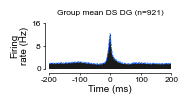

In [87]:
######################################################################################
event_type = 'ds'
ctype = 'pdg'
######################################################################################
idata = np.squeeze(allDat[event_type][ctype][0])

size_scale = 1
figsize = [4*size_scale,
           1.5*size_scale]

pulse_type = ext[1:].rsplit('_',3)[0]
print(event_type,ctype)

nms = [200,200]
binwidth = 1 # nms[0] / 40
ymin,ymax = get_ylim(ctype,group_type,pulse_type=event_type)
xscale = 1
xtick_width = 100 * xscale
ytick_width = ymax/2

zthresh = 3.0
xlab = 'Time (ms)'
    
midpoint = int(nms[0] / binwidth)
baseline = None

ylab = 'Firing\nrate (Hz)'
xmin,xmax = [-nms[0],nms[1]]

if ymax > .9: yt_fmt = '.0f'
else: yt_fmt = '.1f'
####################################################################################################################
box_lims = [0,pulse_width]
ax_lims = [-nms[0],nms[1]]
min_dur = None
av = 'mean'
err_bars = True
####################################################################################################################
fscale = (6,7)
lw = 0.5
pad = 1.5
set_lims = True
####################################################################################################################
fig,ax = sbf.plot_group_pulse(idata,nms=nms,binwidth=binwidth,figsize=figsize,av=av,savgol=False)
if err_bars:
    ax = sbf.plot_err_bars(ax,idata,nms,axis=1,lw=lw,color=BLUE)
####################################################################################################################
ax.xaxis.set_major_locator(Ticker.MultipleLocator(xtick_width))
ax.yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))
####################################################################################################################
# Plot horizontal line at 0
ax.axhline(0,linewidth=lw,color='k')
# set / get x and y limits
ax.set_xlim(xmin,xmax)
try:
    ax.set_ylim(ymin,ymax)
except:
    print('no ylim set')
ymin,ymax = ax.get_ylim()
print(ymin,ymax)
y_offset = np.abs(ymin)/10
ymin_ = ymin + y_offset
#################################################################################################################################
ax = sbf.set_axis_bounds(ax,(xmin,xmax),(ymin,ymax),sp_len=10)
#################################################################################################################################
ax = sbf.adjust_plot_pub(ax,
                         xlab,
                         ylab,
                         nms=nms,
                         binwidth=binwidth,
                         xscale=xscale,
                         yt_fmt=yt_fmt,
                         fscale=fscale,
                         grid=False,
                         pad=pad)
##################################################################################################################
stitle = ' '.join(('Group mean',
                  event_type.upper(),
                  ctype_dict[ctype],
                  '(n=' + str(idata.shape[-1]) + ')'))
ax.set_title(stitle, y=1.0, x=0.5, fontsize=fscale[0])
##################################################################################################################
plt.show()
##################################################################################################################

pdg (400, 921)
p3 (400, 388)
p1 (400, 887)
bdg (400, 242)
b3 (400, 66)
b1 (400, 96)


/tmp/ipykernel_125521/2728778176.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[indx].set_xticklabels(xticks,fontsize=fs[0])
/tmp/ipykernel_125521/2728778176.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(yticks, rotation=0, fontsize=fs[0])


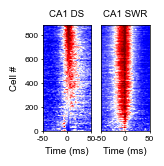

In [46]:
##############################################################################
# Figure 1G, Figure 2F
##############################################################################
ikey_list = ['ds','swr']
ctype = 'p1'
sort_event = 'ds'
##############################################################################
zscore_dat = generate_z_score(allDat,
                              celltype,
                              smpts=3)
zscore_dat = remove_nans_paired(zscore_dat,
                                okey_list=celltype,
                                ikey_list=ikey_list)
event_type_list = ikey_list
##########################################################
fwd,fht = 1.75*len(event_type_list),3.5
##########################################################
lw = 0.5
cmap = 'seismic'
vmin = -2
vmax_list = [4,4,4,4]
xmin,xmax = 50,50
xoffset = 200
x_maj_loc = xmax
y_maj_loc_dict = {'pdg':200,'p3':100,'p1':200,'bdg':100,'b3':100,'b1':200}
pad = 1.5
################################################################################################
sorted_strength = True
binstep = 5
binsize = 5
xlab = 'Time (ms)'
ylab = 'Cell #'
colbar = False
fs = (6,7)
###############################################################################################
fig,ax = plt.subplots(1,len(event_type_list),
                      figsize=sbf.cm2inch(fwd,fht))
###############################################################################################
for indx,event_type in enumerate(event_type_list):
    im_dat = zscore_dat[event_type][ctype]
    binned_data = bin_array(zscore_dat[sort_event][ctype],
                            axis=0,
                            binstep=binstep,
                            binsize=binsize,
                            func=np.nanmean)

    midpoint = int(binned_data.shape[0] / 2)
    ind = np.lexsort((binned_data[midpoint+1, :],
                      binned_data[midpoint, :]))
    if sorted_strength:
        im_dat = im_dat[:,ind]
    
    stitle = ctype_dict[ctype] + ' ' + event_type.upper()
    
    im = ax[indx].imshow(im_dat.T,
                         aspect='auto',
                         cmap=cmap,
                         vmin=vmin,
                         vmax=vmax_list[indx])
    
    pulses = im_dat.shape[1]
    ylim = (0,pulses)
    ax[indx].set_ylim(ylim)
    ax[indx].set_title(stitle,fontsize=fs[1])
    
    ax[indx].set_xlim(-xmin+xoffset,xmax+xoffset)
    ax[indx].xaxis.set_major_locator(Ticker.MultipleLocator(x_maj_loc))
    ax[indx].yaxis.set_major_locator(Ticker.MultipleLocator(y_maj_loc_dict[ctype]))

    xticks = ax[indx].get_xticks()
    xticks = [format(x-xoffset,'.0f') for x in xticks]
    ax[indx].set_xticklabels(xticks,fontsize=fs[0])
    ax[indx].set_xlabel(xlab,fontsize=fs[1])
    ax[indx].set_ylabel(ylab,fontsize=fs[1])
    ax[indx].tick_params(width=lw,length=3*lw,pad=pad)
###########################################################################################    
yticks = ax[0].get_yticks()
yticks = [format(x,'.0f') for x in yticks]
ax[0].set_yticklabels(yticks, rotation=0, fontsize=fs[0])
###########################################################################################
for indx in np.arange(1,len(ikey_list)):
    ax[indx].yaxis.set_visible(False) # Hide y axis
###########################################################################################
for ax_ in ax:
    for sp_pos in ['top','bottom','left','right']:
        ax_.spines[sp_pos].set_linewidth(lw)
###########################################################################################
if colbar:
    tempax = ax[1]
    divider = make_axes_locatable(tempax)
    cax = divider.append_axes("right", size="10%", pad="10%")
    cb1 = fig.colorbar(im,cax=cax,orientation="vertical")
    cb1.ax.tick_params(width=lw,length=3*lw,labelsize=fs[0])
############################################################################################
plt.show()
############################################################################################

In [48]:
###################################################################################################
midpoint = int(allDat['ds']['pdg'][0].shape[0] / 2)
xrange = (180,220)
offset = int((xrange[1] - xrange[0]) / 2)
print('midpoint:',midpoint,'xrange:',xrange,'offset(ms):',offset)
npts = 3
z_thresh = 3.0
celltype = ['pdg','p3','p1','bdg','b3','b1']
###################################################################################################
zscore_dat = generate_z_score(allDat,
                              celltype,
                              smpts=npts
                             )

zmax_dat = generate_z_max(zscore_dat,
                          xrange=xrange,
                          smooth=True,
                          npts=npts
                         )

argmax_dat = create_argmax_dict(zscore_dat,
                                xrange=xrange,
                                offset=offset
                               )

argmax_sig_dat = remove_non_sig(argmax_dat,
                                zmax_dat,
                                z_thresh=z_thresh)

meanrate_dat = generate_mean_rate(allDat,
                                 celltype,
                                 xrange=(0,150)
                                 )

maxrate_dat = generate_mean_rate(allDat,
                                 celltype,
                                 xrange=(198,202)
                                 )

baserate_dat = generate_mean_rate(allDat,
                                 celltype,
                                 xrange=(0,100)
                                 )
###################################################################################################
sig_mask,sig_dat = calculate_sig_z_score(zmax_dat,z_thresh=z_thresh)
###################################################################################################
maxrate_dat['baseline'] = {'pdg':np.array([]),
                           'p3':np.array([]),
                           'p1':np.array([]),}

for cindx,ctype in enumerate(celltype):
    maxrate_dat['baseline'][ctype] = baserate_dat['ds2'][ctype]

temp_maxrate_dat = sbf.reverse_dict(maxrate_dat)

midpoint: 200 xrange: (180, 220) offset(ms): 20


/tmp/ipykernel_125521/2664297119.py:90: RuntimeWarning: All-NaN slice encountered
  tempdat = np.nanmax(temparray,axis=0)
/tmp/ipykernel_125521/2664297119.py:74: RuntimeWarning: Mean of empty slice
  tempdict[ctype] = np.nanmean(tempdat[xrange[0]:xrange[1]],


pdg_baseline
pdg_ds1
pdg_ds2
pdg_ds
pdg_swr
p3_baseline
p3_ds1
p3_ds2
p3_ds
p3_swr
p1_baseline
p1_ds1
p1_ds2
p1_ds
p1_swr
10960
10960


/Dupret_Lab/venv/venv0/lib/python3.10/site-packages/dabest/plotter.py:473: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  rawdata_plot = sns.swarmplot(data=plot_data, x=xvar, y=yvar,
/Dupret_Lab/venv/venv0/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Dupret_Lab/venv/venv0/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Dupret_Lab/venv/venv0/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Dupret_Lab/venv/venv0/lib/python3.10/site-packages/dabest/plotter.py:563: UserWarning: Fixed

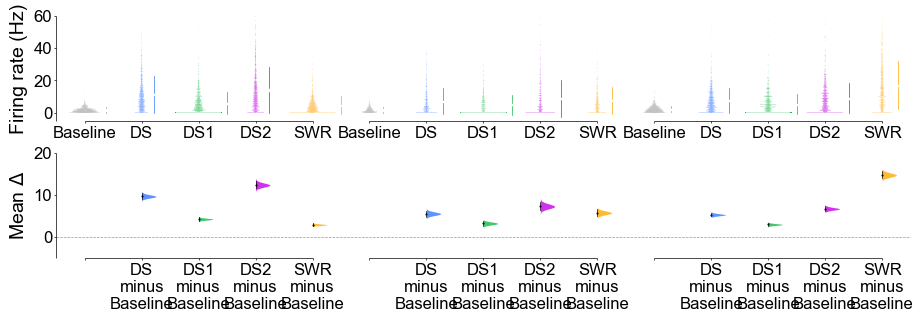

28 8


,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_wilcoxon,statistic_wilcoxon,pvalue_paired_students_t,statistic_paired_students_t
0,pdg_baseline,pdg_ds,917,917,mean difference,baseline,9.624525,95,9.006786,10.360022,0.0,9.370683e-147,3005.0,6.425230e-127,-28.271685
1,pdg_baseline,pdg_ds1,917,917,mean difference,baseline,4.227989,95,3.877641,4.627323,0.0,5.768554e-101,37718.0,5.145711e-89,-22.407654
2,pdg_baseline,pdg_ds2,917,917,mean difference,baseline,12.308363,95,11.507586,13.248609,0.0,2.630482e-146,3085.0,1.150776e-124,-27.928340
3,pdg_baseline,pdg_swr,917,917,mean difference,baseline,2.899249,95,2.629562,3.236321,0.0,3.427544e-99,39592.5,1.726040e-65,-18.554541
4,p3_baseline,p3_ds,388,388,mean difference,baseline,5.505597,95,4.843803,6.224045,0.0,1.942839e-51,3256.0,2.940378e-41,-15.202789
5,p3_baseline,p3_ds1,388,388,mean difference,baseline,3.202313,95,2.664969,3.769487,0.0,2.115353e-22,14170.0,4.016573e-25,-11.122158
6,p3_baseline,p3_ds2,388,388,mean difference,baseline,7.250547,95,6.291461,8.356767,0.0,5.459164e-46,5009.5,3.632030e-35,-13.714904
7,p3_baseline,p3_swr,388,388,mean difference,baseline,5.717597,95,5.008014,6.523665,0.0,1.540313e-51,3710.0,2.334071e-39,-14.743409
8,p1_baseline,p1_ds,887,887,mean difference,baseline,5.273736,95,4.903294,5.758154,0.0,2.838647e-129,9717.0,1.233930e-100,-24.343992
9,p1_baseline,p1_ds1,887,887,mean difference,baseline,2.957248,95,2.627809,3.332950,0.0,2.214721e-57,69232.0,5.222516e-54,-16.585639


In [40]:
####################################################################################################
# Figure 2g
####################################################################################################
idata = temp_maxrate_dat

outerkey = ['baseline','ds1','ds2','ds','swr']
innerkey = ['pdg','p3','p1']
col_head = ['id','Event_Type','Cell_Type','Data','Group_sess']
col_groups = {
              'pdg':'pdg',
              'p3':'p3',
              'p1':'p1',
             }

idata = sbf.nan_free_dict(idata,outerkey,innerkey)
df = sbf.dabest_long_df_2var(idata,innerkey,outerkey,col_groups,col_head)

df_idx = [
            ['pdg_baseline','pdg_ds','pdg_ds1','pdg_ds2','pdg_swr'],
            ['p3_baseline', 'p3_ds','p3_ds1','p3_ds2','p3_swr'],
            ['p1_baseline', 'p1_ds','p1_ds1','p1_ds2','p1_swr']
         ]
####################################################################################################
paired = 'baseline'
analysis_of_long_df = db2.load(df,
                              x="Group_sess", 
                              y="Data",
                              idx=((df_idx)),
                              paired=paired,
                              id_col="id"
                              )
########################################################################################################
show_pairs = False
######################################################################################################
fwd,fht = 28,8
diff_type = 'mean'
swlab = 'Firing rate (Hz)'
if diff_type == 'mean':
    eslab = 'Mean ' + r'$\Delta$'
    stats_test = analysis_of_long_df.mean_diff.statistical_tests
elif diff_type == 'median':
    eslab = 'Median ' + r'$\Delta$'
    stats_test = analysis_of_long_df.median_diff.statistical_tests
#######################################################################################################
my_color_palette = [gray2, GREEN, PURPLE, BLUE, ORNG,
                    gray2, GREEN, PURPLE, BLUE, ORNG,
                    gray2, GREEN, PURPLE, BLUE, ORNG
                   ]
#####################################################################################################
size_scale = 0.5
swarm_ylim = (-5,60)
contrast_ylim = (-5,20) #(-5,15)
swarm_maj_loc = 20
contrast_maj_loc = 10 #5 #contrast_ylim[1] / 2
font_scale = (12,14,16)
pad = 1.5
bw_method = .5 #sbf.calc_mean_bw(idata,innerkey,outerkey)
########################################################################################################
fig,swarm_ax,contrast_ax = sbf.smdabest_plot(analysis_of_long_df,
                                             diff_type=diff_type,
                                             figsize=[fwd,fht],
                                             size_scale=size_scale,
                                             swarm_ylim=swarm_ylim,
                                             contrast_ylim=contrast_ylim,
                                             my_color_palette=my_color_palette,
                                             swlab=swlab,
                                             eslab=eslab,
                                             fs=font_scale,
                                             show_pairs=show_pairs,
                                             maj_loc=[swarm_maj_loc,contrast_maj_loc],
                                             bw_method=bw_method
                                            )
########################################################################################################
sw_xtlabs,con_xtlabs = sbf.generate_dabest_xtlabs(df_idx,max_char=8,str_indx=1,upper_case=False)
sw_xtlabs = ['Baseline','DS','DS1','DS2','SWR',
             'Baseline','DS','DS1','DS2','SWR',
             'Baseline','DS','DS1','DS2','SWR',]

con_xtlabs = ['','DS\nminus\nBaseline','DS1\nminus\nBaseline','DS2\nminus\nBaseline','SWR\nminus\nBaseline',
              '','DS\nminus\nBaseline','DS1\nminus\nBaseline','DS2\nminus\nBaseline','SWR\nminus\nBaseline',
              '','DS\nminus\nBaseline','DS1\nminus\nBaseline','DS2\nminus\nBaseline','SWR\nminus\nBaseline'
             ]
swarm_ax.set_xticklabels(sw_xtlabs)
contrast_ax.set_xticklabels(con_xtlabs)
########################################################################################################
plt.show()
########################################################################################################
print(fwd,fht)
analysis_of_long_df.mean_diff.statistical_tests
########################################################################################################

In [ ]:
### stop here

In [ ]:
event = 'ds'
ctype = 'p3'
z_thresh = 3.0
offset = 20
midpoint = 200
xrange = (midpoint-offset,midpoint+offset)

#cindx = 0

all_z_cross = []
#rng = zscore_dat[event][ctype].shape[1]
rng = sig_mask[event][ctype]
print(rng.shape)

#rng = 500
for cindx in rng: #range(rng):
    idata = zscore_dat[event][ctype][xrange[0]:xrange[1],cindx]
    try:
        z_cross = np.where(idata >= z_thresh)[0][0] - offset
    except IndexError:
        z_cross = np.nan
        print('no value over thresh')
    #print(z_cross,np.nanmax(idata))
    all_z_cross.append(z_cross)
    #xpts = np.linspace(-offset,offset,idata.shape[0])

    #plt.plot(xpts,idata)
    #plt.axhline(z_thresh,color=gray2,linewidth=0.5)
    #plt.axvline(z_cross,color='r',linewidth=0.5)
#plt.show()

#print(sig_mask[event][ctype])
all_z_cross = np.array(all_z_cross)
print(np.nanmean(all_z_cross))

In [ ]:
np.nanmean(all_z_cross)

In [ ]:
### Get % for range of z_thresh values

all_sig_mask = {}
all_sig_dat = {}

z_list = [2,2.58,3.0,3.5,4]
for zindx,z_thresh in enumerate(z_list):
    all_sig_mask[z_thresh],all_sig_dat[z_thresh] = calculate_sig_z_score(zmax_dat,z_thresh=z_thresh)

In [ ]:
#z_list = [1.645,1.96,2.58,3,3.29,3.72]
event_list = okey_list
ctype_list = ['pdg','p3','p1']

oDict = {}
for ev_indx,event in enumerate(event_list):
    tempdict = {}
    for cindx,ctype in enumerate(ctype_list):
        tempdat = []
        for zindx,z_thresh in enumerate(z_list):
            
            tempdat.append(round(100*all_sig_dat[z_thresh][event][ctype][0] / all_sig_dat[z_thresh][event][ctype][1],2))
        tempdict[ctype] = tempdat
    oDict[event] = tempdict

In [ ]:
ctype_list = ctype_list
event = 'ds2'
ctypecol = {'pdg':BLUE,'p3':RED,'p1':ORNG}
labels = [ctype_dict[x] for x in ctype_list]

fwd,fht = 6,3
lw = 0.5

xlim = (4,1.9)
xtick_width = .5
ytick_width = 25
ylim = (0,100)

fs = (6,7)

fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(fwd,fht),)

for indx,ctype in enumerate(ctype_list):
    
    idata = oDict[event][ctype][::-1]
    xpts = z_list[::-1]
    ax.plot(xpts,idata,linewidth=lw,color=ctypecol[ctype])

ax.set_xlim(xlim)
ax.axvline(0,linewidth=lw,linestyle='--',color=gray2)

ax.legend([x.upper() for x in labels],
          fontsize=fs[1],
          frameon=False,
          handlelength=1,
          bbox_to_anchor=(1.00,1.1))

ax.set_ylim(ylim)
ax.xaxis.set_major_locator(Ticker.MultipleLocator(xtick_width))
ax.yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))
ax = sbf.set_axis_bounds(ax,xlim,ylim,sp_len=3)    
ax = sbf.adjust_plot_pub(ax,
                        xlab='Activation threshold (z-score)',
                        ylab='Cells activated (%)',
                        xt_fmt='.1f',
                        yt_fmt='.0f',
                        fscale=fs,
                        grid=False,
                        pad=1.5)

for vline in z_list:
    ax.axvline(vline,linewidth=lw,linestyle='--',color=gray2)

plt.show()

In [ ]:
######Save the figure############################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/ActivatedCells/' + event + '/'
ftitle = '_'.join(('Act_thresh',
                   day_type,
                   group_type,
                   event,
                   str(fwd) + 'x' + str(fht)))
#################################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg',dl=False)
#################################################################################################

In [ ]:
output_matrix = np.array([]).reshape(len(celltype)+2,0)

for zkey,sig_dat in all_sig_dat.items():
    print('z =',zkey)
    for key,val in sig_dat.items(): # event type
        tempdat = []
        for key2,val2 in sig_dat[key].items(): # ctype
            tempdat.append(round(100 * (sig_dat[key][key2][0]/sig_dat[key][key2][1]),2))
            
            print('{0:} {1:} {2: }/{3:} {4:.0f}%'.format(key,
                                                          key2,
                                                          sig_dat[key][key2][0],
                                                          sig_dat[key][key2][1],
                                                          100 * (sig_dat[key][key2][0]/sig_dat[key][key2][1])
                                                         )
                 )
        print(zkey,key,tempdat)
        print()
        output_matrix = np.concatenate((output_matrix,))

In [ ]:
print(allDat['ds']['pdg'][0].shape)

start_bin,end_bin = 150,250
n_bins = int(end_bin - start_bin)
event = 'ds'
ctype_list = ['pdg','p3','p1']
npts = 3
temp_hlines = []

oMat = np.array([]).reshape(n_bins,0)
print(oMat.shape)
for cindx,ctype in enumerate(ctype_list):
    tempdat = np.squeeze(allDat[event][ctype][0].copy())
    cinds = sig_mask[event][ctype]
    tempdat = tempdat[start_bin:end_bin,cinds]
    #tempdat = stats.zscore(tempdat,axis=0)
    print(tempdat.shape)
    max_ind_order = np.argsort(np.nanmax(tempdat,axis=0))[::-1]
    print(max_ind_order.shape)
    tempdat = savgol_filter(tempdat[:,max_ind_order],npts,1,axis=0)
    print(tempdat.shape)
    oMat = np.concatenate((oMat,tempdat.reshape(tempdat.shape[0],-1)),axis=1)
    temp_hlines.append(oMat.shape[1])
    
#oMat = oMat[~np.isnan(oMat)].reshape(nbins,-1)
plt.imshow(oMat.T,aspect='auto',cmap='jet',vmax=10,vmin=0)
plt.ylim(0,oMat.shape[-1])

hlines = temp_hlines
print(hlines)
for hline in hlines:
    plt.axhline(hline,linewidth=2,color=gray2)
plt.show()

In [ ]:
######Save the figure############################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/' + event_type + '/'
ftitle = '_'.join(('Group_mean',
                   day_type,
                   group_type,
                   ctype,
                   'n',
                   str(idata.shape[-1]),
                   event_type,
                   str(figsize[0])+'x'+str(figsize[1])))
#################################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg',dl=False)
#################################################################################################

In [ ]:
midpoint = int(allDat['ds']['pdg'][0].shape[0] / 2)
xrange = (180,220)
offset = int((xrange[1] - xrange[0]) / 2)
print('midpoint:',midpoint,'xrange:',xrange,'offset(ms):',offset)
print(celltype)
z_thresh = 3
npts = 3
ctypecol = {'pdg':BLUE,'p3':RED,'p1':ORNG}

zscore_dat = generate_z_score(allDat,
                              celltype,
                              smpts=npts
                             )

zmax_dat = generate_z_max(zscore_dat,
                          xrange=xrange,
                          smooth=True,
                          npts=npts
                         )

sig_mask,sig_dat = calculate_sig_z_score(zmax_dat,z_thresh=z_thresh)
#print(sig_mask[event][ctype])

event = 'ds'
#ctype = 'pdg'
start_bin,end_bin = 180,220
midpoint = 200
offset = int((end_bin - start_bin)/2)
iDict = zscore_dat

for cindx,ctype in enumerate(ctype_list):
    print(ctype)
    cinds = sig_mask[event][ctype]
    tempdat = iDict[event][ctype][start_bin:end_bin,:]

    xpts = np.linspace(-offset,offset,tempdat.shape[0])
    data_to_plot = stats.zscore(np.nanmean(tempdat,axis=1))
    plt.plot(xpts,data_to_plot,c=ctypecol[ctype])

plt.xlim(-offset,offset)
plt.show()

In [ ]:
######Save the figure###########################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis' + '/figures/DSResponses/PSTH/'
ftitle = 'Max_z_ds_versus_max_z_swr' + '_' + day_type + '_' + group_type + '_' + ctype + '_' \
            + str(figsize[0]) + 'x' + str(figsize[1])
################################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
################################################################################################

In [ ]:
idata = zmax_dat

innerkey = ['ds','swr']
outerkey = ['pdgL','pdg','p3','p1','bdg','b3','b1']

outerkey = ['pdg','p3','p1']

col_head = ['id','Group_Type','Cell_Type','Data','Group_Cell']
col_groups = {'ds':'ds',
              'ds1':'ds1',
              'ds2':'ds2',
              'swr':'swr'
             }

df = sbf.dabest_long_df_2var(idata,innerkey,outerkey,col_groups,col_head)

In [ ]:
df

In [ ]:
for key,val in zmax_dat.items():
    print(key)
    zmax_dat[key]['all'] = np.concatenate((zmax_dat[key]['pdg'],
                                           zmax_dat[key]['p3'],
                                           zmax_dat[key]['p1'],
                                          ))


In [ ]:
#################################################################
ctype = 'pdg'
ctype_color_dict = {'pdgL':PURPLE,
                    'pdg':BLUE,
                    'p3':RED,
                    'p1':ORNG,
                    'bdg':GREEN,
                    'b3':PINK,
                    'b1':TURQ,
                    'all':gray2}
#################################################################
xlab = 'swr'
ylab = 'ds2'

x = zmax_dat[xlab][ctype]
y = zmax_dat[ylab][ctype]

pearson = False
nbins = 20
#################################################################
outlier_thresh = 4
remove_outlier = False
not_active = 3
remove_notactive = False
remove_active = False
#################################################################
fwd,fht = sbf.cm2inch(8,8)
fs = [6,7]
lw = 0.5
msize = 0.1
pad = 1.5
xtick_width = 2
ytick_width = 2
xt_fmt = '.0f'
yt_fmt = '.0f'
#################################################################
xy_max = np.nanmax([np.nanmax(x),np.nanmax(y)])
xlim = (0,1 + round(xy_max,0))
ylim = (0,1 + round(xy_max,0))

x_outlier = np.nanmean(x) + outlier_thresh * np.nanstd(x)
y_outlier = np.nanmean(y) + outlier_thresh * np.nanstd(y)

if remove_outlier:
    x[x>x_outlier] = np.nan
    y[y>y_outlier] = np.nan
    
if remove_notactive:
    y[y<not_active] = np.nan

if remove_active:
    y[y>not_active] = np.nan
    
x,y = sbf.remove_nan_two_lists(x,y)

g = sns.jointplot(x=x,
                  y=y,
                  dropna=True,
                  kind='scatter',
                  marker='.',
                  marginal_kws={'bins': nbins},
                  joint_kws={'size': msize,
                             'color': ctype_color_dict[ctype]}
                 )

g.fig.set_figwidth(fwd)
g.fig.set_figheight(fht)

g.ax_marg_x.set_xlim(xlim)
g.ax_marg_y.set_ylim(ylim)

for ax_ in [g.ax_marg_x,g.ax_marg_y]:
    ax_.tick_params(width=lw,length=3*lw,pad=pad)
    for each_ in ['top','bottom','left','right']:
        ax_.spines[each_].set_linewidth(lw)

plt.setp(g.ax_marg_y.patches,fc=ORNG,ec='white',alpha=0.8)
plt.setp(g.ax_marg_x.patches,fc=BLUE,ec='white',alpha=0.8)

g.set_axis_labels(xlabel='Max z-value during ' + xlab.upper(),
                  ylabel='Max z-value during ' + ylab.upper(),
                  fontsize=fs[1])

g.ax_joint.axvline(np.nanmean(x),linestyle='--',linewidth=lw,color='k')
g.ax_joint.axhline(np.nanmean(y),linestyle='--',linewidth=lw,color='k')
#########################################################################################
if pearson:
    rval,pval = stats.mstats.pearsonr(x,y)
    print('Pearson')
else:
    rval,pval = stats.mstats.spearmanr(x,y)
    print('Spearman')

if pval < 0.001:
    pval = 0.001
    symbol = '<'
else:
    symbol = '='

ostr = str('{0:}: r({1:}) = {2:.2f}, p {3:} {4:.3f} \nVar exp: {5:.1f}%'.format(ctype_dict[ctype],
                                                                                 x.shape[0],
                                                                                 rval,
                                                                                 symbol,
                                                                                 pval,
                                                                                 100*rval**2,
                                                                                ))
print(ostr)
#g.ax_joint.annotate(ostr,(0.5,xy_max-1),fontsize=fs[1])
############################################################################################
ax = g.ax_joint
ax = sbf.plot_fit(ax,x,y,(0,8),lcol=PURPLE,lw=2*lw)

ax.xaxis.set_major_locator(Ticker.MultipleLocator(xtick_width))
ax.yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))
ax.tick_params(width=lw,length=3*lw,pad=pad)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(lw)
    ax.spines[axis].set_position(('outward', 3))
    
xtlabs = ax.get_xticks().tolist()
xtlabs = [format(x,xt_fmt) for x in xtlabs]
ax.set_xticklabels(xtlabs,fontsize=fs[0])

ytlabs = ax.get_yticks().tolist()
ytlabs = [format(y,yt_fmt) for y in ytlabs]
ax.set_yticklabels(ytlabs,fontsize=fs[0])
ax.legend_.remove()
############################################################################################
plt.show()
############################################################################################

In [ ]:
######Save the figure###################################################################
fig = g.fig
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/ActivatedCells/'
et_str = '_'.join((xlab,ylab))
ftitle = '_'.join(('JointGrid',
                   day_type,
                   group_type,
                   ctype,
                   et_str,
                   str(format(fwd,'.2f') + 'x' + str(format(fht,'.2f')))
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [ ]:
ctype = 'p3'
z_thresh = 3.0
print(all_sig_mask[z_thresh]['ds'][ctype])
print()
print(all_sig_mask[z_thresh]['swr'][ctype])


6.539611809307314
3.968608855082425


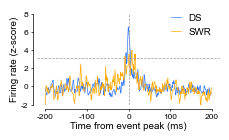

In [12]:
event_type_list = ['ds','swr'] #,'swr']
ctype = 'p3'
cindx = 67 #34
eventcol = {'ds':BLUE,'swr':ORNG}

fwd,fht = 6,3
xtick_width = 100
ytick_width = 2
ylim = (-2,8)
savgol = False
npts = 3
nms = (200,200)
binwidth = 1
fs = (6,7)
hlines = [3.1] #z_list

fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(fwd,fht),)

for indx,event_type in enumerate(event_type_list):
    
    idata = zscore_dat[event_type][ctype]
    if savgol:
        idata = savgol_filter(idata,npts,1)
    xpts = np.arange(-nms[0],nms[1],binwidth)
    ax.plot(xpts,idata[:,cindx],linewidth=lw,color=eventcol[event_type])
    print(np.nanmax(idata[xrange[0]:xrange[1],cindx]))

    
ax.axvline(0,linewidth=lw,linestyle='--',color=gray2)
ax.legend([x.upper() for x in event_type_list],
          fontsize=fs[1],
          frameon=False,
          handlelength=1,
          bbox_to_anchor=(1.00,1.1))

ax.set_ylim(ylim)
ax.xaxis.set_major_locator(Ticker.MultipleLocator(xtick_width))
ax.yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))
ax = sbf.set_axis_bounds(ax,(-nms[0],nms[1]),ylim,sp_len=3)    
ax = sbf.adjust_plot_pub(ax,
                         xlab='Time from event peak (ms)',
                         ylab='Firing rate (z-score)',
                         fscale=fs,
                         grid=False)

for hline in hlines:
    ax.axhline(hline,linewidth=lw,linestyle='--',color=gray2)
plt.show()

In [ ]:
######Save the figure###################################################################
savefig = True
sel_dur = str(xmin+xmax) + 'ms'
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/single_neuron/'
ftitle = '_'.join(('Single_psth',
                   day_type,
                   group_type,
                   ctype,
                   str(cindx),
                   'smooth'+str(npts),
                   str(fwd) + 'x' + str(fht)
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [ ]:
def calc_peak_time_activation(allDat,event_type,ctype,zmax_dat,ctype_dict,xrange=(180,220),z_thresh=3,pprint=True):
    '''
    
    '''
    idata = allDat[event_type][ctype][0]

    temp_max_dat = zmax_dat[event_type][ctype]
    z_inds = np.nonzero(temp_max_dat > z_thresh)[0]

    argmax = np.argmax(np.squeeze(idata[xrange[0]:xrange[1],:]),axis=0)
    argmax = argmax[z_inds]

    offset = (xrange[1] - xrange[0]) / 2
    odata = np.array([x-offset for x in argmax])

    if pprint:
        print('{0:} {1:} {2:} cells, mean peak time: {3:.1f} +/- {4:.1f} ms'.format(event_type,
                                                                                    odata.size,
                                                                                    ctype_dict[ctype],
                                                                                    np.nanmean(odata),
                                                                                    sbf.stdErr(odata)))
        
        percentile = sbf.calc_percentiles(odata)
        print('{0:} {1:} {2:} cells, median peak time: {3:.1f} +/- {4:} ms'.format(event_type,
                                                                              odata.size,
                                                                              ctype_dict[ctype],
                                                                              np.nanmedian(odata),
                                                                              percentile[:2]))    
    return odata

In [ ]:
################################################################################################
def resp_lat_one_cell(idata,z_thresh=3):
    '''
    
    '''
    try:
        response_latency = (np.argwhere(idata >= z_thresh)[0]) - offset
    except IndexError:
        #print(IndexError.with_traceback)
        response_latency = np.nan
    return response_latency
################################################################################################
def find_response_latency(iDict,event,ctype,z_thresh=3,offset=20,savgol=False,npts=3):
    '''
    
    '''
    print(iDict[event][ctype].shape)
    midpoint = int(iDict[event][ctype].shape[0] / 2)
    xrange = (int(midpoint-offset),int(midpoint+offset))
    n_cells = iDict[event][ctype].shape[-1]
    
    odata = np.zeros((n_cells))
    for clu_indx in np.arange(n_cells):
        idata = iDict[event][ctype][xrange[0]:xrange[1],clu_indx]
        if savgol:
            idata = savgol_filter(idata,npts,1)
        odata[clu_indx] = resp_lat_one_cell(idata,z_thresh=z_thresh)
        
    return odata
#################################################################################################

In [ ]:
event_type_list = ['ds','ds1','ds2','swr']
ctype_list = ['pdg','p3','p1']
z_thresh = 3.0
offset = 20
savgol = True
npts = 3
mask = True

zscore_dat = generate_z_score(allDat,
                              celltype,
                              smpts=npts)

'''zscore_dat = remove_nans_paired(zscore_dat,
                                okey_list=celltype,
                                ikey_list=ikey_list)'''

print()
iDict = zscore_dat
all_response_latency = {}

for ev_indx,event_type in enumerate(event_type_list):
    tempdict = {}
    for cindx,ctype in enumerate(ctype_list):
        print(event_type,ctype)
        tempdict[ctype] = find_response_latency(iDict,
                                                event_type,
                                                ctype,
                                                z_thresh=z_thresh,
                                                offset=offset,
                                                savgol=savgol,
                                                npts = npts)
        if mask:
            cinds = sig_mask[event_type][ctype]
            tempdict[ctype] = tempdict[ctype][cinds]
        print(event_type,ctype,tempdict[ctype][~np.isnan(tempdict[ctype])].shape,np.nanmean(tempdict[ctype]))

    all_response_latency[event_type] = tempdict
    print()

In [ ]:
event_type_list = ['ds','ds1','ds2','swr']
ctype_list = ['pdg','p3','p1']
z_thresh = 3
xrange = (180,220)

all_argmax = {}

for ev_indx,event_type in enumerate(event_type_list):
    tempdict = {}
    for cindx,ctype in enumerate(ctype_list):
        tempdict[ctype] = calc_peak_time_activation(allDat,
                                                    event_type,
                                                    ctype,
                                                    zmax_dat,
                                                    ctype_dict,
                                                    xrange=xrange,
                                                    z_thresh=z_thresh,
                                                    pprint=True)
    all_argmax[event_type] = tempdict
    print()

In [ ]:
####################################################################################################
idata =  all_argmax #all_response_latency # all_argmax #
####################################################################################################
innerkey = ['ds','swr','ds1','ds2']
outerkey = ['pdg','p3','p1']
col_head = ['id','Event_Type','Cell_Type','Data','Group_sess']
col_groups = {
              'ds':'ds',
              'swr':'swr',
              'ds1':'ds1',
              'ds2':'ds2',
             }
####################################################################################################
df = sbf.dabest_long_df_2var(idata,innerkey,outerkey,col_groups,col_head)
####################################################################################################
df_idx = [
            ['ds_pdg', 'ds_p3', 'ds_p1'],
            ['swr_p1','swr_p3','swr_pdg'],
         ]

'''df_idx = [
            ['ds_p3', 'ds_p1'],
            ['swr_p3','swr_p1'],
         ]

df_idx = [
            ['ds1_pdg', 'ds1_p3', 'ds1_p1'],
            ['ds2_pdg', 'ds2_p3', 'ds2_p1'],
         ]'''
####################################################################################################
paired = None
analysis_of_long_df = db2.load(df,
                               x="Group_sess", 
                               y="Data",
                               idx=((df_idx)),
                               paired=paired,
                               id_col="id"
                               )
######################################################################################################
show_pairs = False
######################################################################################################
nplots= len(sbf.flatten(df_idx))
fwd,fht = 1.25*nplots,4 #1.25*nplots,4
diff_type = 'mean'
swlab = 'Response\nlatency (ms)'
if diff_type == 'mean':
    eslab = 'Mean ' + r'$\Delta$'
    stats_test = analysis_of_long_df.mean_diff.statistical_tests
elif diff_type == 'median':
    eslab = 'Median ' + r'$\Delta$'
    stats_test = analysis_of_long_df.median_diff.statistical_tests
#######################################################################################################
my_color_palette = [BLUE,RED,ORNG,BLUE,RED,ORNG,PURPLE,LIGHTBLUE,BLUE,LIGHTORNG2,ORNG,LIGHTRED,RED]

#my_color_palette = [RED,ORNG,RED,ORNG,PURPLE,LIGHTBLUE,BLUE,LIGHTORNG2,ORNG,LIGHTRED,RED]
#######################################################################################################
size_scale = 0.5
swarm_ylim = (-30,30)
contrast_ylim = (-4,8) #(-4,8)
swarm_maj_loc = 15
contrast_maj_loc = 4
font_scale = (6,7,9)
pad = 1.5
bw_method = .5 #sbf.calc_mean_bw(idata,innerkey,outerkey)
########################################################################################################
fig,swarm_ax,contrast_ax = sbf.smdabest_plot(analysis_of_long_df,
                                             diff_type=diff_type,
                                             figsize=[fwd,fht],
                                             size_scale=size_scale,
                                             swarm_ylim=swarm_ylim,
                                             contrast_ylim=contrast_ylim,
                                             my_color_palette=my_color_palette,
                                             swlab=swlab,
                                             eslab=eslab,
                                             fs=font_scale,
                                             show_pairs=show_pairs,
                                             maj_loc=[swarm_maj_loc,contrast_maj_loc],
                                             bw_method=bw_method
                                            )
########################################################################################################
sw_xtlabs = ['DG','CA3','CA1',
             'CA1','CA3','DG']

con_xtlabs = ['','CA3\nminus\nDG','CA1\nminus\nDG',
              '','CA3\nminus\nDG','CA1\nminus\nDG']

'''sw_xtlabs = ['CA3','CA1',
             'CA3','CA1']

con_xtlabs = ['','CA1\nminus\nDG',
              '','CA1\nminus\nDG',]'''
#sw_xtlabs = sbf.generate_dabest_xtlabs(df_idx,max_char=4,str_indx=1)
swarm_ax.set_xticklabels(sw_xtlabs)
contrast_ax.set_xticklabels(con_xtlabs)
########################################################################################################
plt.show()
########################################################################################################
analysis_of_long_df.mean_diff.statistical_tests
########################################################################################################

In [ ]:
######Save the figure###################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/dabest/'
event_str = 'ds_only' #'_'.join(())
metric_str = 'resp_lat'
ftitle = '_'.join(('Dabest',
                   day_type,
                   group_type,
                   event_str,
                   metric_str,
                   str(fwd) + 'x' + str(fht)
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [ ]:
df

In [ ]:
event = 'ds'
ctype = 'pdg'

cinds = sig_mask[event][ctype]
all_argmax[event][ctype].shape

In [ ]:
idata_list = [all_response_latency,all_argmax]

idata = idata_list[1]
########################################################################################################
innerkey = ['ds','swr','ds1','ds2']
outerkey = ['pdg','p3','p1']
col_head = ['id','Event_Type','Cell_Type','Data','Group_sess']
col_groups = {
              'ds':'ds',
              'swr':'swr',
              'ds1':'ds1',
              'ds2':'ds2',
             }
###################################################################################################
df = sbf.dabest_long_df_2var(idata,innerkey,outerkey,col_groups,col_head)
###################################################################################################
query_list = ['Event_Type =="ds"', 'Event_Type =="swr"']
event_list = ['ds','swr']

query = query_list[1]
event = event_list[1]

axtype = sns.boxplot
order = outerkey[::-1]
##################################################################################################
fwd,fht = 5,3
offset = 20
xtick_width = 10
xlim = (-20,20)
ylim = (2,0)
##################################################################################################
boxprops = dict(linestyle='-',linewidth=0.5)
whiskerprops=dict(linestyle='-',linewidth=0.5,color='k')
capprops=dict(linestyle='-',linewidth=0.5,color='k')
##################################################################################################
df_temp = df.query(query)

fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(fwd,fht))
ax = axtype(data=df_temp,
            x='Data',
            y='Cell_Type',
            hue='Cell_Type',
            order=order,
            palette=my_color_palette,
            showfliers=False,
            saturation=1,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops)

ax.legend([],[],frameon=False)

ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.xaxis.set_major_locator(Ticker.MultipleLocator(xtick_width))
ax.tick_params(width=lw,length=3*lw,pad=pad)
#################################################################################################
ax = sbf.adjust_plot_pub(ax,
                         xlab='Latency (ms)',
                         ylab='Cell Type',
                         lw=0.5,
                         raster=False,
                         nms=(20,20),
                         binwidth=1,
                         xtwidth=1,
                         xscale=1,
                         yscale=1,
                         xt_fmt='.0f',
                         yt_fmt='.0f',
                         fscale=[6,7],
                         grid=False,
                         gridcolor='k',
                         pad=1.5)
plt.show()

In [ ]:
######Save the figure###################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/timing/'
event_str = event
metric_str = 'argmax'
ftitle = '_'.join(('Boxplot',
                   metric_str,
                   day_type,
                   group_type,
                   event_str,
                   str(fwd) + 'x' + str(fht)
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [ ]:
event = 'ds'
ctype = 'p3'

all_response_latency[event][ctype].shape

cinds = sig_mask[event][ctype]

tempdat = all_response_latency[event][ctype][cinds]
print(tempdat.shape)

allDat[event][ctype][0].shape

im_dat = zscore_dat[event][ctype][:,cinds]

ymax = im_dat.shape[-1]

cmap = 'seismic'
vmin = -2
vmax = 3

xmin,xmax = 150,250
#xoffset = 200

fig,ax = plt.subplots(1,1,
                      figsize=sbf.cm2inch(fwd,fht))

ax.imshow(im_dat.T,
          aspect='auto',
          cmap=cmap,
          vmin=vmin,
          vmax=vmax)

ax.set_xlim(xmin,xmax)
ax.set_ylim(0,ymax)
plt.show()

In [ ]:
## Print activation times

for key,val in argmax_sig_dat.items():
    print(key)
    for key2,val2 in val.items():
        print('{0:} {1:} {2:.2f} {3:.2f}'.format(key2,
                                                 val2.shape[0],
                                                 np.nanmedian(val2),
                                                 sbf.stdErr(val2)))

In [ ]:
######Save the figure###################################################################
savefig = True
sel_dur = str(xmin+xmax) + 'ms'
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/heatmaps/'
ftitle = '_'.join(('Heatmap',
                   day_type,
                   group_type,
                   ctype,
                   sort_event,
                   sel_dur,
                   cmap,
                   str(fwd) + 'x' + str(round(fht,1))
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [74]:
def get_subset_sorted_array(zscore_dat,event_type,ctype,binstep,binsize):
    '''
    
    '''
    im_dat = zscore_dat[event_type][ctype]
    binned_data = bin_array(zscore_dat[sort_event][ctype],
                            axis=0,
                            binstep=binstep,
                            binsize=binsize,
                            func=np.nanmean)

    midpoint = int(binned_data.shape[0] / 2)
    ind = np.lexsort((binned_data[midpoint+1, :],
                      binned_data[midpoint, :]))
    if sorted_strength:
        im_dat = im_dat[:,ind]

    return im_dat

In [75]:
def count_below_thresh(zscore_dat,event_type,ctype,xrange=(195,205),z_thresh=0):
    '''

    '''
    idata = zscore_dat[event_type][ctype][xrange[0]:xrange[1],:]
    plt_dat = np.nanmean(idata,axis=0)

    inds = plt_dat < z_thresh
    count_below = [plt_dat[inds].shape[0], plt_dat.shape[0]]
    print('{0:6} {1:6} {2:}/{3:} {4:5.0f}%'.format(event_type,
                                                ctype,
                                                plt_dat[inds].shape[0],
                                                plt_dat.shape[0], 
                                                100*(plt_dat[inds].shape[0]/ plt_dat.shape[0])
                                               )
         )

    return count_below

/tmp/ipykernel_125521/2664297119.py:146: RuntimeWarning: Mean of empty slice
  idata = [func(np.take(idata,np.arange(int(i*binstep),int(i*binstep+binsize)),0),0) for i in np.arange(dims[axis]//binstep)]
/tmp/ipykernel_125521/2328944269.py:6: RuntimeWarning: Mean of empty slice
  plt_dat = np.nanmean(idata,axis=0)


ds1    pdg    152/921    17%
921 152
there are 152 samples
ds1    p3     100/388    26%
388 100
there are 100 samples
ds1    p1     274/887    31%
887 274
there are 274 samples


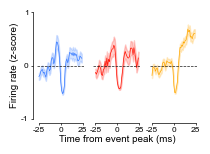

In [77]:
event_type = 'ds1'

ctype_list = ['pdg','p3','p1']#,'bdg','b3','b1']
sort_event = event_type
fwd,fht = 1.75*len(ctype_list),3.5
#######################################################################################################################
cellcol = {'pdgL':PURPLE,'pdg':BLUE,'p3':RED,'p1':ORNG,'bdg':LIGHTBLUE,'b3':LIGHTRED,'b1':LIGHTORNG2}
nms = (100,100)
dur = int(np.sum(nms))
offset = 200
xscale = 1
lb,ub = int(offset-dur/2),int(offset+dur/2)
sorted_strength = True
binstep = 5
binsize = 5
########################################################################################################################
ylim_dict = {'ds1':(-1,2),'ds2':(-1,5),'ds':(-1,5),'swr':(-1,5)}
ylim = ylim_dict[event_type]
ylim = (-1,1)
#xtick_width = 200
ytick_width = 1
yt_fmt = '.0f'
savgol = False
fraction = 0.25 #1 #0.25
count_below = True
z_thresh = 0 #-.2
xrange = (195,205)
xlim_bounds = (-dur/2,dur/2)
ylim_bounds = ylim
fscale = (6,7)
########################################################################################################################
fig,ax = plt.subplots(1,len(ctype_list),
                      figsize=sbf.cm2inch(fwd,fht),
                      gridspec_kw = {'wspace':0.2,'hspace':0},
                      sharey=True)
########################################################################################################################
for cindx,ctype in enumerate(ctype_list):
    
    im_dat = get_subset_sorted_array(zscore_dat,event_type,ctype,binstep,binsize)
    ncells = im_dat.shape[1]
    lowest_fraction = int(ncells * fraction)
    
    if count_below:
        lowest_fraction = count_below_thresh(zscore_dat,event_type,ctype,xrange=xrange,z_thresh=z_thresh)
        lowest_fraction = int(lowest_fraction[0])
        nms = (25,25)
        ylim = (-1,1)
        dur = int(np.sum(nms))
        xlim_bounds = (-dur/2,dur/2)
        ylim_bounds = ylim
        lb,ub = int(offset-dur/2),int(offset+dur/2)

    print(ncells,lowest_fraction)
    idata = im_dat[lb:ub,:lowest_fraction]
    xpts = np.arange(lb-offset,ub-offset)
    ax[cindx].plot(xpts,np.nanmean(idata,axis=1),linewidth=lw,color=cellcol[ctype])
    pos_err,neg_err = sbf.calc_err_bars(idata,axis=1,savgol=savgol,npts=3)
    ax[cindx].fill_between(xpts,neg_err,pos_err,color=cellcol[ctype],alpha=0.2)
    ax[cindx].yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))
    ax[cindx].axhline(0,linewidth=lw,linestyle='--',color='k')
    if cindx > 0:
        ax[cindx].get_yaxis().set_visible(False)
        ax[cindx].spines['left'].set_visible(False)
########################################################################################################################
for indx,ax_ in enumerate(ax):
    ax_.set_ylim(ylim)
    if indx > 0:
        ax_.yaxis.set_tick_params(labelleft=False)
        #ax_.set_yticks([])
    ####################################################################################################################    
    ax_ = sbf.set_axis_bounds(ax_,xlim_bounds,ylim_bounds,sp_len=3)
    ax_ = sbf.adjust_plot_pub(ax_,
                         xlab='',
                         ylab='',
                         nms=nms,
                         binwidth=binwidth,
                         xscale=xscale,
                         yt_fmt=yt_fmt,
                         fscale=fscale,
                         grid=False,
                         pad=pad)
    
ax[0].set_ylabel('Firing rate (z-score)')

ax[1].set_xlabel('Time from event peak (ms)')
########################################################################################################################
plt.tight_layout()
plt.show()
########################################################################################################################

In [ ]:
######Save the figure###################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/ActivatedCells/'
first_part = 'All_cells' # 'Lowest_quartile_deactived_by_ctype' #'All_cells' # 'Lowest_quartile_deactived_by_ctype'
ftitle = '_'.join((first_part,
                   day_type,
                   group_type,
                   event_type,
                   str(fwd) + 'x' + str(fht)
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [ ]:
npts = 3

zscore_dat = generate_z_score(allDat,
                              celltype,
                              smpts=npts
                             )

zmax_dat = generate_z_max(zscore_dat,
                          xrange=xrange,
                          smooth=True,
                          npts=npts
                         )

In [ ]:
event_type = 'swr'

ctype_list = ['pdg','p3','p1']
av_method = np.nanmean

fwd,fht = 8,4
#######################################################################################################################
cellcol = {'pdgL':PURPLE,'pdg':BLUE,'p3':RED,'p1':ORNG,'bdg':LIGHTBLUE,'b3':LIGHTRED,'b1':LIGHTORNG2}
nms = (100,100)
dur = int(np.sum(nms))
offset = 200
xscale = 1
lb,ub = int(offset-dur/2),int(offset+dur/2)
########################################################################################################################
ylim_dict = {'ds1':(-1,2),'ds2':(-1,5),'ds':(-2,6),'swr':(-2,6)}
ylim = ylim_dict[event_type]
#ylim = (-1,1)
#xtick_width = 200
ytick_width = 2
yt_fmt = '.0f'
savgol = False
fraction = 1 #0.25
count_below = False
z_thresh = 0 #-.2
xlim_bounds = (-dur/2,dur/2)
ylim_bounds = ylim
fscale = (6,7)

xrange = (180,220)
z_thresh = 3.0
########################################################################################################################
fig,ax = plt.subplots(1,1,
                      figsize=sbf.cm2inch(fwd,fht),
                      gridspec_kw = {'wspace':0.2,'hspace':0},
                      sharey=True)
########################################################################################################################
for cindx,ctype in enumerate(ctype_list):

    im_dat = savgol_filter(zscore_dat[event_type][ctype],npts,1,axis=0)
    print('im_dat',im_dat.shape)
    temp_dat = im_dat[xrange[0]:xrange[1],:]
    print(temp_dat.shape)
    temp_dat = np.nanmax(temp_dat,axis=0)    
    print(temp_dat.shape)
    
    ncells = im_dat.shape[1]
    cinds = np.where(temp_dat > z_thresh)[0]
    
    print(cinds.shape)

    idata = zscore_dat[event_type][ctype][lb:ub,cinds]
    print(ctype,'idata.shape',idata.shape)
    xpts = np.arange(lb-offset,ub-offset)
    ax.plot(xpts,av_method(idata,axis=1),linewidth=lw,color=cellcol[ctype])
    pos_err,neg_err = sbf.calc_err_bars(idata,axis=1,savgol=savgol,npts=npts)
    ax.fill_between(xpts,neg_err,pos_err,color=cellcol[ctype],alpha=0.2)
    ax.set_ylim(ylim)
    ax.yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))
    ax.axhline(0,linewidth=lw,color='k')
    
    ###################################################################################################################
    ax = sbf.set_axis_bounds(ax,xlim_bounds,ylim_bounds,sp_len=3)
    ax = sbf.adjust_plot_pub(ax,
                         xlab='',
                         ylab='',
                         nms=nms,
                         binwidth=binwidth,
                         xscale=xscale,
                         yt_fmt=yt_fmt,
                         fscale=fscale,
                         grid=True,
                         pad=pad)
    
ax.set_ylabel('Firing rate (z-score)')
ax.set_xlabel('Time from event peak (ms)')
########################################################################################################################
plt.tight_layout()
plt.show()
########################################################################################################################

In [ ]:
######Save the figure###################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/ActivatedCells/'
first_part = 'All_cells_one_ax' # 'Lowest_quartile_deactived_by_ctype' #'All_cells' # 'Lowest_quartile_deactived_by_ctype'
ftitle = '_'.join((first_part,
                   day_type,
                   group_type,
                   event_type,
                   str(fwd) + 'x' + str(fht)
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [ ]:
xrange = (198,202)
event_type_list = ['ds1','ds2','ds','swr']
ctype_list = ['pdg','p3','p1']

count_below_dict = {}
for ev_indx,event_type in enumerate(event_type_list):
    tempdict = {}
    for cindx,ctype in enumerate(ctype_list):
        tempdict[ctype] = count_below_thresh(zscore_dat,
                                             event_type,
                                             ctype,
                                             xrange=xrange,
                                             z_thresh=0)

    count_below_dict[event_type] = tempdict
    print()

In [ ]:
print((129+309) / (382+883))
print((59+85)   / (382+883))

In [ ]:
count_below_dict

In [ ]:
event_type = 'ds1'
ctype = 'p1'

idata = zscore_dat[event_type][ctype][xrange[0]:xrange[1],:]
print(idata.shape)
plt_dat = np.nanmean(idata,axis=0)
plt.plot(np.sort(plt_dat))

plt.axhline(0)
plt.show()

In [ ]:
####################################################################################################
ikey_list = ['ds1','ds2']
zscore_dat = generate_z_score(allDat,
                              celltype,
                              smpts=npts)
zscore_dat = remove_nans_paired(zscore_dat,
                                okey_list=celltype,
                                ikey_list=ikey_list)
zmax_dat = generate_z_max(zscore_dat,xrange=xrange)

idata = zmax_dat

innerkey = ['ds1','ds2'] #,'swr']
outerkey = ['pdg','p3','p1']
col_head = ['id','Event_Type','Cell_Type','Data','Group_sess']
col_groups = {
              'ds1':'ds1',
              'ds2':'ds2',
              'swr':'swr',
             }

df = sbf.dabest_long_df_2var(idata,innerkey,outerkey,col_groups,col_head)

df_idx = [
            ['swr_pdg','swr_p3','swr_p1'],
            ['ds_pdg', 'ds_p3', 'ds_p1']
         ]

df_idx = [
            ['ds1_pdg','ds2_pdg','swr_pdg'],
            ['ds1_p3', 'ds2_p3', 'swr_p3'],
            ['ds1_p1', 'ds2_p1', 'swr_p1']
         ]

df_idx = [  #['ds1_pdgL','ds2_pdgL'],
            ['ds1_pdg','ds2_pdg'],
            ['ds1_p3', 'ds2_p3'],
            ['ds1_p1', 'ds2_p1']
         ]

'''df_idx = [
            ['swr_pdg','ds2_pdg'],
            ['swr_p3', 'ds2_p3'],
            ['swr_p1', 'ds2_p1']
         ]'''
####################################################################################################
paired = 'baseline'
analysis_of_long_df = db2.load(df,
                              x="Group_sess", 
                              y="Data",
                              idx=((df_idx)),
                              paired=paired,
                              id_col="id"
                              )
########################################################################################################
show_pairs = False
######################################################################################################
fwd,fht = 10,4
diff_type = 'mean'
swlab = 'Peak firing rate\n(z-score)'
if diff_type == 'mean':
    eslab = 'Mean ' + r'$\Delta$'
    stats_test = analysis_of_long_df.mean_diff.statistical_tests
elif diff_type == 'median':
    eslab = 'Median ' + r'$\Delta$'
    stats_test = analysis_of_long_df.median_diff.statistical_tests
#######################################################################################################
my_color_palette = [LIGHTBLUE,LIGHTRED,LIGHTORNG2,BLUE,RED,ORNG,PURPLE,LIGHTBLUE,BLUE,LIGHTORNG2,ORNG,LIGHTRED,RED]
my_color_palette = [GREEN,GREEN,GREEN,PURPLE,PURPLE,PURPLE]
#######################################################################################################
size_scale = 0.5
swarm_ylim = (-2,12)
contrast_ylim = (0,4)
swarm_maj_loc = 6
contrast_maj_loc = 2
font_scale = (6,7,9)
pad = 1.5
bw_method = .5 #sbf.calc_mean_bw(idata,innerkey,outerkey)
########################################################################################################
fig,swarm_ax,contrast_ax = sbf.smdabest_plot(analysis_of_long_df,
                                             diff_type=diff_type,
                                             figsize=[fwd,fht],
                                             size_scale=size_scale,
                                             swarm_ylim=swarm_ylim,
                                             contrast_ylim=contrast_ylim,
                                             my_color_palette=my_color_palette,
                                             swlab=swlab,
                                             eslab=eslab,
                                             fs=font_scale,
                                             show_pairs=show_pairs,
                                             maj_loc=[swarm_maj_loc,contrast_maj_loc],
                                             bw_method=bw_method
                                            )
########################################################################################################
sw_xtlabs,con_xtlabs = sbf.generate_dabest_xtlabs(df_idx,max_char=4,str_indx=0)
swarm_ax.set_xticklabels(sw_xtlabs)
contrast_ax.set_xticklabels(con_xtlabs)
########################################################################################################
plt.show()
########################################################################################################
analysis_of_long_df.mean_diff.statistical_tests
########################################################################################################

In [ ]:
######Save the figure#########################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/dabest/'
ftitle = 'Dabest_max_z' + '_' + day_type + '_' + group_type + '_' + str(fwd) + 'x' + str(fht)
##############################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
##############################################################################################

In [104]:
mouse = 61
ctype = 'p3'
print(allBaseblock[mouse])
units[mouse][units[mouse]['des'] == ctype]

/Dupret_Lab/merged/smchugh_merged/msm16-181018/msm16-181018


,trode,trode_unit,des
2,1,2,p3
3,1,3,p3
4,1,4,p3
5,1,5,p3
6,1,6,p3
18,4,2,p3
19,4,3,p3
20,4,4,p3
25,5,4,p3
26,5,5,p3


msm16-181018 ['sb0', 'sbsf1', 'sbf1stim'] p3
ds (400, 250)


/tmp/ipykernel_125521/2508952704.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[indx].set_xticklabels(xticks,fontsize=fs[0])
/tmp/ipykernel_125521/2508952704.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[indx].set_yticklabels(yticks, rotation=0, fontsize=fs[0])


swr (400, 750)


/tmp/ipykernel_125521/2508952704.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[indx].set_xticklabels(xticks,fontsize=fs[0])
/tmp/ipykernel_125521/2508952704.py:87: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[indx].set_yticklabels(yticks, rotation=0, fontsize=fs[0])


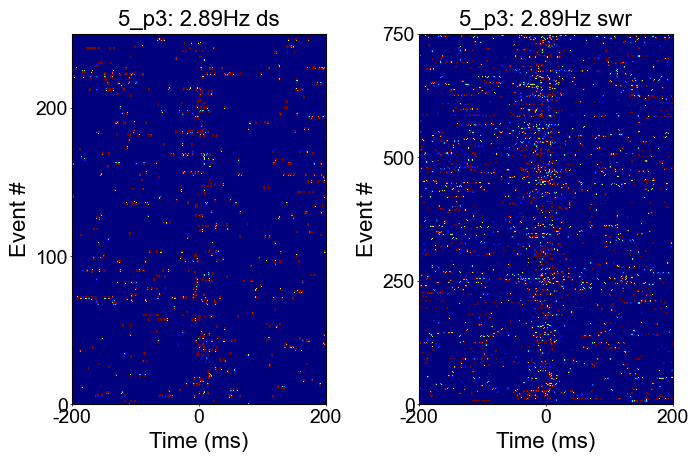

In [131]:
### get one cell pulse correlation

mouse = 61
cluID = 5 # 20 # 39 
nms = (200,200)
binwidth = 1
small = False

event_type_list = ['ds','swr']#,'laser','both']
ext_list = ['.ds_all_no_swr','.swr_all_no_ds']#,'.light_pulse','.swr_all_and_ds']
vmin_list = [0,0,0,0]
vmax_list =  [.03,.05,.2,.5]
#vmax_list =  [.06,.04,.2,.5]
ytick_list = [100,250,100,50]
xtick = 200
xlim = (0,400)
###############################################################################################
min_dur = None
max_dur = None
sleepbox = True
sleeponly = True
###############################################################################################
xlab = 'Time (ms)'
ylab = 'Event #'

lw = 0.5
pad = 1.5
###############################################################################################
if small:
    fwd,fht = 6,4
    fs = [6,7]
else:
    fwd,fht = 18,12
    fs = [14,16]

cmap = 'jet' #'seismic'#'jet'
fig,ax = plt.subplots(1,len(event_type_list),figsize=sbf.cm2inch(fwd,fht))
###############################################################################################
desen,baseblock,ipath,bsnm = sbf.get_mouse_info(alldesen,allBaseblock,mouse)
os.chdir(ipath)
sessions = sbf.get_sessions(desen,sleepbox=sleepbox,sleeponly=sleeponly)
print(bsnm,sessions,units[mouse]['des'][cluID])
allSessFR,gmeanFR = sbf.calc_meanFR_one_mouse(alldesen,allBaseblock,units,mouse,'.col2resofs')
###############################################################################################
max_bin_dict = {'ds':(0,250),'swr':(250,1000)}
event_dict = {}
for indx,(event_type,ext) in enumerate(zip(event_type_list,ext_list)):
    event_dict[event_type] = sbf.pulsecorrelation(baseblock,
                                                  desen,
                                                  sessions,
                                                  cluID,
                                                  nms=nms,
                                                  binwidth=binwidth,
                                                  ext=ext,
                                                  min_dur=min_dur)
    lightC = np.squeeze(event_dict[event_type])
    max_bin = max_bin_dict[event_type]
    lightC = lightC[:,max_bin[0]:max_bin[1]]
    print(event_type,lightC.shape)

    stitle = str(cluID) + '_' + units[mouse]['des'][cluID] + ': ' \
             + str(np.round(gmeanFR[cluID-2],2)) + 'Hz' + ' ' + event_type

    pulses = lightC.shape[1]

    im = ax[indx].imshow(lightC.T,
                         aspect='auto',
                         #norm=colors.Normalize(),
                         cmap=cmap,
                         vmin=vmin_list[indx],
                         vmax=vmax_list[indx])

    ax[indx].set_ylim(0,pulses)
    ax[indx].set_title(stitle,fontsize=fs[1])
    ax[indx].set_xlim(xlim)
    ax[indx].xaxis.set_major_locator(Ticker.MultipleLocator(xtick))
    ax[indx].yaxis.set_major_locator(Ticker.MultipleLocator(ytick_list[indx]))
    
    xticks = ax[indx].get_xticks()
    xticks = [format(x-nms[0],'.0f') for x in xticks]
    ax[indx].set_xticklabels(xticks,fontsize=fs[0])
    ax[indx].set_xlabel(xlab,fontsize=fs[1])
    ax[indx].set_ylabel(ylab,fontsize=fs[1])

    yticks = ax[indx].get_yticks()
    yticks = [format(x,'.0f') for x in yticks]
    ax[indx].set_yticklabels(yticks, rotation=0, fontsize=fs[0])
    ax[indx].tick_params(width=lw,length=3*lw,pad=pad)
###############################################################################################
plt.tight_layout()
plt.show()
###############################################################################################

In [ ]:
######Save the figure###################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/heatmaps/'
ftitle = '_'.join(('Heatmap',
                   day_type,
                   group_type,
                   bsnm,
                   str(cluID),
                   units[mouse]['des'][cluID],
                   cmap,
                   str(fwd) + 'x' + str(fht)
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

msm16-181018
(400, 1, 261)
ref ID: 5 p3


/ddLab/code/smchugh/py/smBaseFunctions3.py:3280: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(xtlabs,fontsize=SMALL_SIZE)
/ddLab/code/smchugh/py/smBaseFunctions3.py:3281: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(ytlabs,fontsize=SMALL_SIZE)


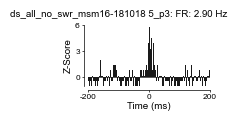

msm16-181018
(400, 1, 1941)
ref ID: 5 p3


/ddLab/code/smchugh/py/smBaseFunctions3.py:3280: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(xtlabs,fontsize=SMALL_SIZE)
/ddLab/code/smchugh/py/smBaseFunctions3.py:3281: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(ytlabs,fontsize=SMALL_SIZE)


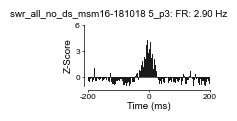

In [132]:

##############################################################################################
savefig = False
fwd,fht = 4,2
##############################################################################################
for ext in ext_list:
    fig,ax = plot_pulse_cross_correl(mouse,
                                     cluID,
                                     alldesen,
                                     allBaseblock,
                                     units,
                                     group_type,
                                     nms=nms,
                                     binwidth=binwidth,
                                     xscale=1,
                                     xtwidth=200,
                                     ext=ext,
                                     zscore=True,
                                     zlims=(-1.0,6),
                                     rawlims=(0,20),
                                     y_offset=0.1,
                                     size_scale=1,
                                     fwd=fwd,
                                     fht=fht,
                                     fscale=[6,7],
                                     fill_and_box=False)
    plt.show()
    ##########################################################################################
    opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/single_neuron/'
    ftitle = '_'.join(('PSTH',
                       day_type,
                       group_type,
                       bsnm,
                       str(cluID),
                       units[mouse]['des'][cluID],
                       ext[1:],
                       str(fwd) + 'x' + str(fht))
                     )
    ##########################################################################################
    if savefig:
        sbf.savefig(fig,opath,ftitle,ext='.svg')
    ##########################################################################################

In [135]:
### Raster

max_bin_dict = {'ds':(0,250),'swr':(250,1000)}

#mouse = 61 # 61
#cluID = 39
desen,baseblock,ipath,bsnm = sbf.get_mouse_info(alldesen,allBaseblock,mouse)
os.chdir(ipath)
sessions = sbf.get_sessions(desen,sleepbox=sleepbox,sleeponly=sleeponly)
print(bsnm,sessions,units[mouse]['des'][cluID])
allSessFR,gmeanFR = sbf.calc_meanFR_one_mouse(alldesen,allBaseblock,units,mouse,'.col2resofs')

event_dict = {}
for indx,(event_type,ext) in enumerate(zip(event_type_list,ext_list)):
    print(event_type)
    event_dict[event_type] = sbf.pulsecorrelation(baseblock,
                                                  desen,
                                                  sessions,
                                                  cluID,
                                                  nms=nms,
                                                  binwidth=binwidth,
                                                  ext=ext,
                                                  min_dur=min_dur)

event_type = 'ds'
lightC = np.squeeze(event_dict[event_type])
max_bin = max_bin_dict[event_type]
lightC = lightC[:,max_bin[0]:max_bin[1]]
print(event_type,lightC.shape)

actmat = lightC.T
print(actmat.shape)

start_ind = 0
end_ind = start_ind + 400
actmat_ = actmat[:,start_ind:end_ind]
print(actmat_.shape)
spk2d = [np.where(actmat_[cid,:]) for cid in range(actmat_.shape[0])]

np.random.seed(11)
colors_ =  ['k' for _ in range(len(spk2d))]
lengths_ = [.9 for _ in range(len(spk2d))]
idx_ = np.random.choice(range(len(spk2d)), len(spk2d), replace=False).astype(int)
spk2d = [sbf.flatten(spk2d[i]) for i in idx_]

#print(spk2d)

msm16-181018 ['sb0', 'sbsf1', 'sbf1stim'] p3
ds
swr
ds (400, 250)
(250, 400)
(250, 400)


/tmp/ipykernel_125521/1732158328.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, rotation=0, fontsize=6)
/ddLab/code/smchugh/py/smBaseFunctions3.py:3281: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(ytlabs,fontsize=SMALL_SIZE)


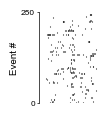

In [136]:
fwd,fht = 1.8,3

fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(fwd,fht))
y_maj_loc = 250
yt_fmat = '.0f'

ax.eventplot(spk2d,color=colors_,linewidths=lw*1.5,linelengths=lengths_)
ax.set_ylim(-.4,actmat_.shape[0]);
ax.yaxis.set_major_locator(Ticker.MultipleLocator(y_maj_loc))

yticks = ax.get_yticks().tolist()
yticks = [format(y,yt_fmat) for y in yticks]
ax.set_yticklabels(yticks, rotation=0, fontsize=6)

sns.despine(bottom=True)
ax.set_xticks([]);

ax = sbf.adjust_plot_pub(ax,ylab='Event #',fscale=(6,7),grid=False)

plt.show()

In [70]:
def plot_pulse_cross_correl(mouse,
                            cluID,
                            alldesen,
                            allBaseblock,
                            units,
                            group_type,
                            nms=[40,40],
                            binwidth=1,
                            xscale=1,
                            xtwidth=100,
                            ext='.light_pulse',
                            zscore=True,
                            zlims=(-3,8),
                            rawlims=(0,20),
                            y_offset=0.1,
                            size_scale=5,
                            fwd=4,
                            fht=1,
                            fscale = [6,7],
                            fill_and_box=False):
    '''
    
    '''
    ###################################################################################################################
    try: sns.reset_orig()
    except: print()
    desen,baseblock,ipath,bsnm = sbf.get_mouse_info(alldesen,allBaseblock,mouse)
    os.chdir(ipath)
    print(bsnm)
    ###################################################################################################################
    midpoint = int(nms[0] / binwidth)
    baseline = None
    xlab = 'Time (ms)'
    ylab = 'Z-score'
    xmin,xmax = [-nms[0],nms[1]]
    ymin,ymax = [-5,20]
    xtick_width = xtwidth * xscale
    box_lims = [0,5]
    ax_lims = [-nms[0],nms[1]]
    min_dur = None
    ###################################################################################################################
    if zscore:
        ymin,ymax = [zlims[0],zlims[1]]
        ytick_width = int(ymax/2)
        ylab = 'Z-Score'
    else:
        ymin,ymax = [rawlims[0],rawlims[1]]
        ytick_width = ymax
        ylab = 'Counts'

    figsize = [fwd*size_scale,fht*size_scale]
    alpha = 0.2
    lw = 0.5
    pad = 1.5
    set_lims = True
    ###################################################################################################################
    sessions = sbf.get_sessions(desen,sleepbox=True)
    lightC = sbf.pulsecorrelation(baseblock,desen,sessions,cluID,nms=nms,binwidth=binwidth,ext=ext,min_dur=min_dur)
    print(lightC.shape)
    ###################################################################################################################
    fig,ax = sbf.plot_ac(lightC,cluID,units,mouse,nms=nms,binwidth=binwidth,baseline=baseline,
                         figsize=figsize,ac=False,prob=False,zscore=3)
    ###################################################################################################################
    if set_lims:
        ax.set_xlim(xmin,xmax)
        ax.set_ylim(ymin,ymax)
    ###################################################################################################################
    ax.xaxis.set_major_locator(Ticker.MultipleLocator(xtick_width))
    ax.yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))
    ###################################################################################################################
    # Plot horizontal line at 0
    ax.axhline(0,linewidth=lw,color='k')
    
    # set / get x and y limits
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ymin,ymax = ax.get_ylim()
    ymin_ = ymin + y_offset

    allSessFR,gmeanFR = sbf.calc_meanFR_one_mouse(alldesen,allBaseblock,units,mouse,'.col2resofs')
    cell_ID = units[mouse]['des'][cluID]
    FRate = 'FR: {0:.2f} Hz'.format(np.round(gmeanFR[cluID-2],1))
    ext_str = ext[1:]
    ax.set_title(ext_str + '_' + bsnm + ' ' + str(cluID) + '_' + cell_ID + ': ' + FRate, fontsize=fscale[1])

    ax.spines['left'].set_position(('outward', 3))
    ax.spines['bottom'].set_position(('outward', 3))
    ax.spines['left'].set_bounds((ymin,ymax))
    ax.spines['bottom'].set_bounds((xmin, xmax))

    ax = sbf.adjust_plot_pub(ax,xlab,ylab,nms=nms,binwidth=binwidth,xscale=xscale,fscale=fscale,grid=False,pad=pad)

    return fig,ax

In [ ]:
######################################################################################################
## Plot AC ##
######################################################################################################
ylab = 'Counts'
xlab = 'Time (ms)'
######################################################################################################
nms = [40.,40.]
binwidth = (nms[0] / 40.)
fscale = [6,7,14]
figsize = [3,3]
pad = 1.5
intv_type = '.col2resofs'
######################################################################################################
autoC = sbf.autocorrelation(baseblock,desen,sessions,cluID,nms=nms,binwidth=binwidth)
print(autoC.shape)
######################################################################################################
fig,ax = sbf.plot_ac(autoC,cluID,units,mouse,nms=nms,binwidth=binwidth,figsize=figsize,prob=False)
allSessFR,gmeanFR = sbf.calc_meanFR_one_mouse(alldesen,allBaseblock,units,mouse,intv_type)
ax = sbf.adjust_plot_pub(ax,xlab,ylab,fscale=fscale,pad=pad,grid=False)

stitle = '_'.join((str(cluID),
                   units[mouse]['des'][cluID],
                   ': '+ str(np.round(gmeanFR[cluID-2],2)) + 'Hz'
                  ))

ax.set_title(stitle,y=+1.0,x=+.25,fontsize=MEDIUM_SIZE+4)
######################################################################################################
plt.show()
######################################################################################################

In [ ]:

z_thresh = 3
fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(fwd,fht))
midpoint = 200
xoffset = 50
count_sig = 0
for cindx in np.arange(nCells):
    tempdat = savgol_filter(zscore_dat['ds']['p1'][midpoint-xoffset:midpoint+xoffset,cindx],3,1)
    sig = tempdat[tempdat > z_thresh] 

ax.plot(tempdat)
ax.axhline(z_thresh)

In [ ]:
sig_dat

In [ ]:
###################################################################################################
data_to_plot = sig_dat# count_below_dict # sig_dat #
event_type_list = ['ds','swr'] #sbf.keys_to_list(data_to_plot)[:2]

figsize = (5,3) #(4.2,3)
ylim = (0,100)
ylab = 'Significant\nactivation (%)'#'Suppressed Rate (%)'

col_groups = {'pdgL':'abDGC',
              'pdg':'DG',
              'p3':'CA3',
              'p1':'CA1',
              'bdg':'iDG',
              'b3':'iCA3',
              'b1':'iCA1'
             }
####################################################################################################
print(event_type_list)
cell_temp = ['pdg','p3','p1']
####################################################################################################
idata = []
for event_indx,event_type in enumerate(event_type_list):
    for cindx,ctype in enumerate(cell_temp):
        idata.append((data_to_plot[event_type][ctype][0] / data_to_plot[event_type][ctype][1]) * 100)
        print('{0:} {1:.0f}'.format(ctype,idata[-1]))
####################################################################################################

fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(*figsize))
xlim = (0,len(idata))

barwidth = 0.6
xtick_width = 1
ytick_width = int(ylim[1]/2)
yt_fmt = '.0f'
xlab = ''

cellcol = {'pdgL':PURPLE,'pdg':BLUE,'p3':RED,'p1':ORNG,'bdg':GREEN,'b3':PINK,'b1':TURQ}
ccol = (BLUE,RED,ORNG,BLUE,RED,ORNG)
lfsize = 7
####################################################################################################
xpts = np.arange(len(idata))
rects1 = ax.bar(xpts,idata,width=barwidth,color=ccol,align='center')
####################################################################################################

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')

ax.set_xlabel(xlab,fontsize=lfsize)
ax.set_ylabel(ylab,fontsize=lfsize)
ax.set_ylim(ylim)

ax.xaxis.set_major_locator(Ticker.MultipleLocator(xtick_width))
ax.yaxis.set_major_locator(Ticker.MultipleLocator(ytick_width))

xtlabs = np.tile([col_groups[x] for x in cell_temp],len(event_type_list)).tolist()

'''for rect, label in zip(rects1, xtlabs):
    height = rect.get_height()
    ax.text(
            rect.get_x() + rect.get_width() / 2, height + 6, label, ha="center", va="bottom",fontsize=lfsize
           )
    ax.text(
            rect.get_x() + rect.get_width() / 2, height - 20, format(rect.get_height(),'.0f')+'%', ha="center", va="bottom",fontsize=lfsize
           )'''

ytlabs = ax.get_yticks().tolist()
ytlabs = [format(y,yt_fmt) for y in ytlabs]

ax.tick_params(width=lw,length=3*lw,pad=pad)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(lw)
    ax.spines[axis].set_position(('outward', 3))

ax.set_xticks(np.arange(len(idata)))

ax = sbf.set_axis_bounds(ax,(0,len(idata)-1),ylim,sp_len=3)
ax.xaxis.set_ticklabels(xtlabs,fontsize=lfsize)
ax.yaxis.set_ticklabels(ytlabs,fontsize=lfsize)

plt.show()

In [ ]:
######Save the figure###################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/ActivatedCells/'
et_str = '_'.join((event_type_list))
ftitle = '_'.join(('Percent_activated',
                   day_type,
                   group_type,
                   et_str,
                   str(figsize[0]) + 'x' + str(figsize[1])
                  ))
########################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
########################################################################################

In [ ]:
odf = sbf.count_cells_multi(mouseID,origIDs,clist=celltype)

odf

In [ ]:
def count_cells_each_ctype(mouseID,origIDs,clist=['pdg','p3','p1'],output_df=True):
    '''
    
    '''
    odata = np.zeros((len(mouseID),1 + len(clist)),dtype=object)
    print(odata.shape)
    for mouse,bsnm in enumerate(mouseID):
        odata[mouse,0] = bsnm
        for cindx,ctype in enumerate(clist):
            cluIDs = sbf.multi_ctype_IDs([ctype],origIDs,mouse)
            odata[mouse,cindx+1] = len(cluIDs)
    if output_df:
        columns = ['bsnm',*clist]
        print(columns)
        odf = pd.DataFrame(data=odata,
                           columns=columns
                          )
        return odf

In [ ]:
import pandas as pd

ctype_list = ['pdg','p3','p1']
odf = count_cells_each_ctype(mouseID,origIDs,clist=ctype_list)

for cindx,ctype in enumerate(ctype_list):
    key = ctype + '_cumsum'
    odf[key] = odf[ctype].cumsum()

In [ ]:
odf

In [ ]:
col = 'p1'
threshold = 153

row_indx = odf[col].cumsum().searchsorted(threshold)

odf.iloc[row_indx]

In [ ]:
len(origIDs['p1'][0])

In [ ]:
event_type = 'swr'
ctype = 'pdg'

temprate = np.nanmean(np.squeeze(allDat[event_type][ctype][0]),axis=0)
temp_max_ds = zmax_dat[event_type][ctype]

print(temprate.shape,temp_max_ds.shape)

In [ ]:
### Generate 3d IFR for one rec day

celltype = ['pdg','p3','p1']
sleepbox = True
sleeponly = True
binwidth = 1

# oMat is a timebins x 1 x totalspikes output
mouse = 61
print(mouseID[mouse])
bin_range = (0,250)
cluID_list = 20 #sbf.multi_ctype_IDs(celltype,origIDs,mouse)
cluID = 20
desen,baseblock,ipath,bsnm = sbf.get_mouse_info(alldesen,allBaseblock,mouse)
os.chdir(ipath)
sessions = sbf.get_sessions(desen,sleepbox=sleepbox,sleeponly=sleeponly)
print(bsnm,sessions) #,units[mouse]['des'][cluID])
allSessFR,gmeanFR = sbf.calc_meanFR_one_mouse(alldesen,allBaseblock,units,mouse,'.col2resofs')

nbins = 400
odata = np.array([]).reshape(nbins,0,0)
###############################################################################################

for indx,cluID in enumerate([20,21]):
    tempdat = pulsecorrelation(baseblock,
                                desen,
                                sessions,
                                cluID,
                                nms=nms,
                                binwidth=binwidth,
                                ext=ext,
                                min_dur=min_dur,
                                single_clu=True)

    tempdat = np.squeeze(tempdat)
    #test[:,clu_indx,:] = test[:,:,bin_range[0]:bin_range[1]]
    print()
    print(tempdat.shape)

    odata = np.concatenate((odata,tempdat),axis=-1)

In [ ]:
def pulsecorrelation(baseblock,desen,sessions,cluID,binwidth=1,nms=[40.,40.],ext='.light_pulse',min_dur=None,max_dur=None,samp_rate=20000,single_clu=True):
    '''
    This function takes a baseblock,desen dataframe and a list of sessions
    and a cluID and generates an cross-correlation based on pulsetimes in all sessions given
    binwidth and nmsBefore, nmsAfter are passed as options
    returns a matrix (oMat) which is timebins x 1 x totalspikes
    use plot_ac to visualize
    '''
    # Create output matrix
    tbins  = int(2*(nms[0]/binwidth))
    oMat = np.array([]).reshape(tbins,1,0)
    print(oMat.shape)
    if single_clu:
        cluID_list = [cluID]
    else:
        cluID_list = cluID
    # Loop through sessions
    for sindx,sess in enumerate(sessions):
        ### Select session
        sessionLabel = sbf.get_descode(desen,sess)
        fname = baseblock + '_' + str(sessionLabel['filebase'].index[0])
        ##############################################################################################
        res,clu = vbf.LoadSpikeTimes(fname,trode=None,MinCluId=2,res2eeg=(20000./20000))
        ipath = os.path.split(baseblock)[0] + '/'
        reftemp = sbf.get_pulsetimes(ipath,desen,sess,ext,tconv=None,debug=False)
        duration = [(y-x) for x,y in zip(reftemp['begin'].values,reftemp['end'].values)]
        #print(duration)
        refTimes = reftemp['begin'].values
        if min_dur is not None:
            refTimes = [x for (x,y) in zip(refTimes,duration) if y > min_dur*samp_rate]
            min_pulses = 1
        if max_dur is not None:
            refTimes = [x for (x,y) in zip(refTimes,duration) if y < max_dur*samp_rate]
        else:
            min_pulses = 1
        #print('Min pulse duration is {0:}. Min no pulses/sess is {1:}'.format(min_dur,min_pulses))
        if len(refTimes) > min_pulses: # Must be more than one Light ON trial in the session
            refEdges = sbf.generate_edges(refTimes,binwidth=binwidth,nmsBefore=nms[0],nmsAfter=nms[1])
            tempMat = sbf.generate_3Difr_matrix(res,clu,cluID_list,refEdges)
            print(tempMat.shape)
            oMat = np.concatenate((oMat,tempMat),axis=-1)
        ##############################################################################################          
    return oMat 

In [ ]:
tbins = 400

test_output = np.array([]).reshape(tbins,0,0)
print(test_output.shape)

In [93]:
mouse = 61

sleepbox = True
sleeponly = True

desen,baseblock,ipath,bsnm = sbf.get_mouse_info(alldesen,allBaseblock,mouse)
os.chdir(ipath)
sessions = sbf.get_sessions(desen,sleepbox=sleepbox,sleeponly=sleeponly)
print(bsnm,sessions)

cluID_list = sbf.multi_ctype_IDs(celltype,origIDs,mouse)
ext_list = ['.ds_all_no_swr','.swr_all_no_ds'] #,'.theta_pulse']
nms = (25,25)
binwidth = 1
n_bins = int(np.sum(nms) / binwidth)
max_dur = None

output_dict = {}
for ext_indx,ext in enumerate(ext_list):
    print(ext)
    n_cells = len(cluID_list)
    output_array = np.array([]).reshape(n_bins,n_cells,0)
    print(output_array.shape)
    for sindx,sess in enumerate(sessions):
        ### Select session
        sessionLabel = sbf.get_descode(desen,sess)
        fname = baseblock + '_' + str(sessionLabel['filebase'].index[0])
        
        ##############################################################################################
        res,clu = vbf.LoadSpikeTimes(fname,trode=None,MinCluId=2,res2eeg=(20000./20000))
        ipath = os.path.split(baseblock)[0] + '/'
        reftemp = sbf.get_pulsetimes(ipath,desen,sess,ext,tconv=None,debug=False)
        #duration = [(y-x) for x,y in zip(reftemp['begin'].values,reftemp['end'].values)]
        #print(duration)
        refTimes = reftemp['begin'].values
        if len(refTimes) > 1:
            refEdges = sbf.generate_edges(refTimes,binwidth=binwidth,nmsBefore=nms[0],nmsAfter=nms[1])
            temp_mat = sbf.generate_3Difr_matrix(res,clu,cluID_list,refEdges)
            print(temp_mat.shape)

            output_array = np.concatenate((output_array,temp_mat),axis=-1)
        else:
            print(sess,'not enough', ext, 'pulses')
    okey = ext[1:].split('_',3)[0]
    output_dict[okey] = output_array

msm16-181018 ['sb0', 'sbsf1', 'sbf1stim']
.ds_all_no_swr
(50, 46, 0)
(50, 46, 13)
(50, 46, 153)
(50, 46, 95)
.swr_all_no_ds
(50, 46, 0)
(50, 46, 259)
(50, 46, 795)
(50, 46, 887)


ds 32 (50, 46)
(46, 50)
[[41], [], [], [], [], [], [16, 22, 31, 42], [], [], [], [], [], [], [], [], [], [], [26, 31], [], [], [], [], [], [], [], [], [], [], [], [31, 36, 42], [], [], [], [], [], [], [], [27], [], [], [], [17, 39], [], [], [], []]


/tmp/ipykernel_125521/2484535251.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, rotation=0, fontsize=fscale[0])
/ddLab/code/smchugh/py/smBaseFunctions3.py:3280: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(xtlabs,fontsize=SMALL_SIZE)
/ddLab/code/smchugh/py/smBaseFunctions3.py:3281: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(ytlabs,fontsize=SMALL_SIZE)


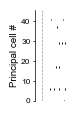

ds 4 (50, 46)
(46, 50)
[[], [], [], [], [], [], [11, 17, 23], [18, 24], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [23], [], [], [], [], [], [26], [], [], [10], [], [], [], [], [25, 35], [], [], [], [], [], [17], [], []]


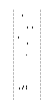

ds 62 (50, 46)
(46, 50)
[[19], [5], [], [23, 30], [12], [], [4, 10, 12, 15, 17, 19, 21, 25, 27, 30, 32, 35], [6], [], [22, 31], [8], [], [], [22], [24, 33], [], [], [3, 9], [], [], [21], [], [], [1, 10, 16, 19, 22, 27, 29, 33], [20], [14, 20, 21], [17], [], [28], [10], [25], [17], [11, 22, 32], [], [], [], [], [], [], [18], [8], [30], [6], [8, 13, 21, 27, 29, 31], [], []]


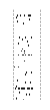

ds 110 (50, 46)
(46, 50)
[[], [], [], [], [], [], [2, 18, 22, 25, 37], [], [], [], [], [], [], [], [], [], [], [], [], [], [15], [26], [], [16, 24], [], [], [], [], [], [], [], [], [], [], [], [], [], [24], [], [], [], [], [], [], [], []]


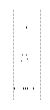

ds 120 (50, 46)
(46, 50)
[[], [], [], [], [], [17, 20, 22], [22, 26, 34, 41], [], [], [], [], [], [], [], [], [], [16, 39, 48], [], [], [], [], [], [], [31], [], [], [], [], [], [], [], [27], [], [], [15], [], [], [17, 28], [], [], [], [], [25, 31, 36, 39], [], [], []]


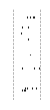

ds 132 (50, 46)
(46, 50)
[[], [], [], [], [], [], [19], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [21], [], [], [], [], [], [], [], [], [], [], [], [], [], [18], [], [], [], [], [], [], [], []]


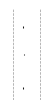

swr 32 (50, 46)
(46, 50)
[[], [], [], [], [], [], [14, 26, 30, 42, 46], [], [33], [30], [], [], [], [], [34], [], [], [], [], [], [], [], [], [44], [], [24, 33], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [32], [], []]


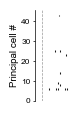

swr 4 (50, 46)
(46, 50)
[[], [15, 33], [], [], [], [], [3, 12, 17, 21, 25, 28, 31, 34], [], [], [], [], [], [], [33], [12], [], [], [], [], [], [], [], [], [14, 29, 35], [], [], [], [16], [], [9, 39], [], [], [28], [28, 31], [], [10], [], [], [], [], [], [22], [23], [], [], []]


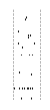

swr 62 (50, 46)
(46, 50)
[[31], [], [19], [], [], [], [4, 9, 12, 20, 23, 31, 42], [], [], [], [5], [16], [], [], [], [], [], [], [], [], [], [], [], [3, 8, 19], [], [], [], [25], [], [], [], [], [], [], [], [], [18], [], [], [], [], [], [], [], [], []]


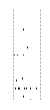

swr 110 (50, 46)
(46, 50)
[[], [], [], [], [], [], [0, 3, 5, 8, 13, 14, 22, 25, 30, 34], [21], [], [], [30], [], [10], [], [], [1], [], [], [], [], [], [], [], [1, 8, 12, 15, 17, 21, 27], [], [], [], [], [], [14], [], [], [], [], [7], [], [7, 13], [], [], [10], [], [], [], [], [], []]


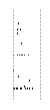

swr 120 (50, 46)
(46, 50)
[[], [], [], [], [], [], [3, 6, 9, 13, 19, 23, 30], [7], [], [], [], [], [], [], [], [], [], [19], [6], [], [], [], [], [5, 14], [], [23], [], [], [], [], [], [], [], [], [], [18], [], [], [41], [], [], [], [], [], [], []]


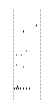

swr 132 (50, 46)
(46, 50)
[[], [5], [], [22], [], [], [5, 16, 22, 26, 29, 38], [], [], [], [], [13], [], [], [], [], [], [], [33], [], [], [18], [], [14, 20, 29], [], [], [], [], [12], [], [], [], [], [], [], [], [], [], [], [5], [], [31, 40], [], [], [], []]


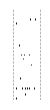

In [96]:
savefig = False

ev_indx_list = [32,4,62,110,120,132]#[20,22,25]
#ev_indx_list = [110]#[20,22,25]
midpoint = int(np.sum(nms) / 2)
offset = 25
vline_list = [midpoint-offset,midpoint+offset-1]
line_col = gray2
x_maj_loc = 200
y_maj_loc = 10
lw = 0.5
fscale = (6,7)
despine_x = True
despine_y = False
############################################################################################################
fwd,fht = 1.0,3
############################################################################################################
for key,val in output_dict.items():
    output_array = output_dict[key]
    despine_y = False
    ylab = 'Principal cell #'
    for fig_indx,ev_indx in enumerate(ev_indx_list):
        actmat = output_array[:,:,ev_indx]
        print(key,ev_indx,actmat.shape)
        if fig_indx > 0: 
            despine_y = True
            ylab = ''
        fig,ax = plot_event_raster(actmat,
                                   fwd=fwd,
                                   fht=fht,
                                   col='k',
                                   x_maj_loc=x_maj_loc,
                                   y_maj_loc=y_maj_loc,
                                   yt_fmt='.0f',
                                   despine_x=despine_x,
                                   despine_y=despine_y,
                                   lw=lw,
                                   fscale=fscale,
                                   ylab=ylab
                                  )
        for vline in vline_list:
            ax.axvline(vline,linewidth=lw,linestyle='--',color=line_col)
        plt.show()
        opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/single_neuron/'
        ftitle = '_'.join(('Raster_one_event',
                           day_type,
                           group_type,
                           bsnm,
                           key,
                           str(ev_indx),
                           str(fwd) + 'x' + str(fht))
                         )
        ##########################################################################################
        if savefig:
            sbf.savefig(fig,opath,ftitle,ext='.svg')
        ##########################################################################################

(46, 50)
[[14, 16, 32], [25], [], [], [24], [], [1, 6, 9, 14, 16, 19, 23, 25, 27, 31, 33, 36, 39], [], [], [30], [19, 24], [], [4], [38], [], [], [24], [], [6, 14, 29], [], [], [28], [], [1, 5, 13, 15, 18, 21, 24, 26, 32, 34, 39], [29], [], [], [20, 31], [], [29], [], [19], [], [], [], [], [28], [], [], [0], [], [], [6, 17, 22, 24, 39], [4, 16], [], []]


/tmp/ipykernel_125521/2484535251.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, rotation=0, fontsize=fscale[0])


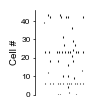

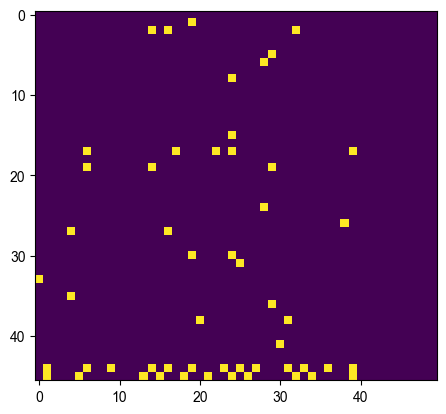

(50, 46)


In [97]:
ev_indx = 13
okey = 'ds'
output_array = output_dict[okey]
actmat = output_array[:,:,ev_indx]

ax = plot_event_raster(actmat,
                       fwd=1.8,
                       fht=2.8,
                       col='k',
                       x_maj_loc=200,
                       y_maj_loc=10,
                       yt_fmt='.0f',
                       despine_x=True,
                       despine_y=False,
                       lw=lw,
                       fscale=fscale,
                       ylab='Cell #')

plt.show()
plt.imshow(actmat.T)
plt.show()

print(actmat.shape)

(46, 50)
[]


/tmp/ipykernel_125521/543004039.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticks, rotation=0, fontsize=6)


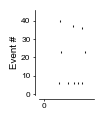

In [98]:
### 

ev_indx_list = [13,14,15,16,17,18]

ev_indx = 0
actmat = output_array[:,:,ev_indx]
actmat_ = actmat.T

print(actmat_.shape)
spk2d = [np.where(actmat_[cid,:]) for cid in range(actmat_.shape[0])]

np.random.seed(11)
colors_ =  ['k' for _ in range(len(spk2d))]
lengths_ = [.9 for _ in range(len(spk2d))]
idx_ = np.random.choice(range(len(spk2d)), len(spk2d), replace=False).astype(int)
spk2d = [sbf.flatten(spk2d[i]) for i in idx_]

print(spk2d[0])
#fwd,fht = 3,3.2

fwd,fht = 1.8,2.8
fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(fwd,fht)) #,sharex=True)

x_maj_loc = 200
y_maj_loc = 10
yt_fmat = '.0f'

ax.eventplot(spk2d,color=colors_,linewidths=lw*1.5,linelengths=lengths_)

ax.set_xlim(-5,actmat_.shape[1])
ax.set_ylim(-.4,actmat_.shape[0]);

ax.xaxis.set_major_locator(Ticker.MultipleLocator(x_maj_loc))
ax.yaxis.set_major_locator(Ticker.MultipleLocator(y_maj_loc))

yticks = ax.get_yticks().tolist()
yticks = [format(y,yt_fmat) for y in yticks]
ax.set_yticklabels(yticks, rotation=0, fontsize=6)

#sns.despine(bottom=True)
#ax.set_xticks([])

ax = sbf.adjust_plot_pub(ax,ylab='Event #',fscale=(6,7),grid=False)

plt.show()

In [95]:
def plot_event_raster(actmat,
                      fwd=1.8,fht=2.8,
                      col='k',
                      x_maj_loc=200,
                      y_maj_loc=10,
                      yt_fmt='.0f',
                      despine_x=False,
                      despine_y=False,
                      lw=0.5,
                      fscale=(6,7),
                      ylab='Event #'):
    '''
    
    '''
    actmat_ = actmat.T

    print(actmat_.shape)
    spk2d = [np.where(actmat_[cid,:]) for cid in range(actmat_.shape[0])]
    
    np.random.seed(11)
    colors_ =  [col for _ in range(len(spk2d))]
    lengths_ = [.9 for _ in range(len(spk2d))]
    idx_ = np.random.choice(range(len(spk2d)), len(spk2d), replace=False).astype(int)
    spk2d = [sbf.flatten(spk2d[i]) for i in idx_]
    print(spk2d)
    ####################
    fig,ax = plt.subplots(1,1,figsize=sbf.cm2inch(fwd,fht)) #,sharex=True)

    ax.eventplot(spk2d,color=colors_,linewidths=lw*1.5,linelengths=lengths_)

    ax.set_xlim(-5,actmat_.shape[1])
    ax.set_ylim(0,actmat_.shape[0]);

    ax.xaxis.set_major_locator(Ticker.MultipleLocator(x_maj_loc))
    ax.yaxis.set_major_locator(Ticker.MultipleLocator(y_maj_loc))

    yticks = ax.get_yticks().tolist()
    yticks = [format(y,yt_fmt) for y in yticks]
    ax.set_yticklabels(yticks, rotation=0, fontsize=fscale[0])

    ax = sbf.adjust_plot_pub(ax,ylab=ylab,fscale=fscale,grid=False)
    
    if despine_x:
        sns.despine(bottom=True)
        ax.set_xticks([])
    if despine_y:
        sns.despine(bottom=True,left=True)
        ax.set_yticks([])
        
    return fig,ax

In [99]:
## mean rate, max rate

event_type_list = sbf.keys_to_list(meanrate_dat)
ctype_list = sbf.keys_to_list(meanrate_dat['ds'])

iDict = meanrate_dat
for ev_indx,event in enumerate(event_type_list):
    print(event)
    for cindx,ctype in enumerate(ctype_list):
        print('    ',ctype,np.nanmean(iDict[event][ctype]))

ds
     pdg 1.98187985706843
     p3 1.9001820267875116
     p1 2.6191857094058273
     bdg 16.000030044244724
     b3 19.96825184764313
     b1 16.332077177886777
swr
     pdg 2.044372512241357
     p3 1.7876702615645392
     p1 2.769172092041617
     bdg 16.947910228537708
     b3 21.245524657008623
     b1 16.460354038449477
ds1
     pdg 2.3264103091953734
     p3 2.1895343011514057
     p1 3.2648617850155537
     bdg 19.30544996855094
     b3 24.210978851992557
     b1 20.449606663134645
ds2
     pdg 1.802664736152524
     p3 1.7172246931853064
     p1 2.277984219066807
     bdg 14.472505152001597
     b3 17.4269090321394
     b1 13.822870058125483


In [100]:
maxrate_dat = generate_mean_rate(allDat,
                                 celltype,
                                 xrange=(195,205)
                                 )

/tmp/ipykernel_125521/2664297119.py:74: RuntimeWarning: Mean of empty slice
  tempdict[ctype] = np.nanmean(tempdat[xrange[0]:xrange[1]],


In [101]:
intv_type = '.col2resofs'

print(event_type_list)
all_gmeanFR = {}

for cindx,ctype in enumerate(ctype_list):
    temp_fr_list = []
    for mindx,mouse in enumerate(mouseID):
        print(mindx,mouse)
        sessions = sbf.get_sessions(alldesen[mindx],sleepbox=True,sleeponly=False)
        clist = origIDs[ctype][mindx]
        allSessFR, gmeanFR = sbf.calc_meanFR_one_mouse_sess(alldesen,allBaseblock,units,mindx,intv_type,sessions,clist=clist)
        print(gmeanFR)
        temp_fr_list.extend(gmeanFR)
    all_gmeanFR[ctype] = np.array(temp_fr_list)

['ds', 'swr', 'ds1', 'ds2']
0 msm04-160720
[1.73986867 0.30312723]
1 msm04-160721
[3.26784832 7.50278704 2.33957197 0.12096519 0.27979774]
2 msm04-160722
[2.85296898 1.79684604 0.58790272 0.2153427  2.7606333  0.46671883
 1.64863708 1.97926533 2.58035886 2.06001884 3.19442872]
3 msm04-160723
[3.93162277 1.09857566 2.45466284 2.72184417 0.13033236 0.27201625
 1.25644599 0.16827589 3.53274268 0.12675873 1.65196265 0.26476388
 0.12823022 0.87974343 2.48798167 1.50575918 3.44529388 2.6723389
 0.07220833 4.89807925 0.33760285 0.51744049 0.99683234 4.29571252]
4 msm06-161024
[0.77682068]
5 msm06-161026
[0.10941255]
6 msm06-161102
[0.16865634 4.59728631 0.14697951 0.06978883]
7 msm08-170317
[1.67774829 3.70472274 0.30168752 0.20356289 0.08508198 1.2364922
 0.58789451 0.08179084 0.63409231 0.06667599]
8 msm08-170322
[2.27440133 2.12659463 3.83817468 1.1220184  2.77159604 0.37955664
 0.50081886 1.74449129 0.12047862 3.07484955 0.8825304  1.03787926
 0.37916484 0.6858466  1.4166523  2.29301185 0


KeyboardInterrupt



In [ ]:
for key,val in all_gmeanFR.items():
    print(key,val.shape[0],np.nanmean(val))

In [ ]:
FR_dict = {}
okey_list = ['Mean','Event']
event = 'ds2'
data_list = [all_gmeanFR,maxrate_dat[event]]

for cindx,ctype in enumerate(ctype_list):
    temp_dict = {}
    for indx,(okey,data) in enumerate(zip(okey_list,data_list)):
        temp_dict[okey] = np.squeeze(data[ctype])
        
    FR_dict[ctype] = temp_dict

In [ ]:
for key,val in FR_dict.items():
    print(key)
    for key2,val2 in val.items():
        print(key2,val2.shape,np.nanmean(val2))

In [ ]:
####################################################################################################
print(event)
idata = FR_dict

innerkey = ['pdg','p3','p1']
outerkey = ['Mean','Event']
col_head = ['id','Event_Type','Cell_Type','Data','Group_sess']
col_groups = {
              'pdg':'DG',
              'p3': 'CA3',
              'p1': 'CA1'
              }

#idata = sbf.nan_free_dict(idata,outerkey,innerkey)
df = sbf.dabest_long_df_2var(idata,innerkey,outerkey,col_groups,col_head)

df_idx = [
            ['DG_Mean', 'DG_Event'],
            ['CA3_Mean','CA3_Event' ],
            ['CA1_Mean','CA1_Event' ]
            ]
####################################################################################################
paired = None #'baseline'
analysis_of_long_df = db2.load(df,
                              x="Group_sess", 
                              y="Data",
                              idx=((df_idx)),
                              paired=paired,
                              id_col="id"
                              )
########################################################################################################
show_pairs = False
######################################################################################################
fwd,fht = 1.0*len(sbf.flatten(df_idx)),3.5
diff_type = 'mean'
swlab = 'Firing rate (Hz)'
if diff_type == 'mean':
    eslab = 'Mean ' + r'$\Delta$'
    stats_test = analysis_of_long_df.mean_diff.statistical_tests
elif diff_type == 'median':
    eslab = 'Median ' + r'$\Delta$'
    stats_test = analysis_of_long_df.median_diff.statistical_tests
#######################################################################################################
my_color_palette = [LIGHTBLUE,LIGHTRED,LIGHTORNG2,BLUE,RED,ORNG,PURPLE,LIGHTBLUE,BLUE,LIGHTORNG2,ORNG,LIGHTRED,RED]
#my_color_palette = [GREEN,GREEN,GREEN,PURPLE,PURPLE,PURPLE]
my_color_palette = [LIGHTBLUE,BLUE,LIGHTRED,RED,LIGHTORNG2,ORNG,BLUE,RED,ORNG,PURPLE,LIGHTBLUE,BLUE,LIGHTORNG2,ORNG,LIGHTRED,RED]
#######################################################################################################
size_scale = 0.5
swarm_ylim = (-5,60)
contrast_ylim = (0,16)
swarm_maj_loc = swarm_ylim[1] / 2
contrast_maj_loc = contrast_ylim[1] / 2
font_scale = (6,7,9)
pad = 1.5
bw_method = .5 #sbf.calc_mean_bw(idata,innerkey,outerkey)
########################################################################################################
fig,swarm_ax,contrast_ax = sbf.smdabest_plot(analysis_of_long_df,
                                             diff_type=diff_type,
                                             figsize=[fwd,fht],
                                             size_scale=size_scale,
                                             swarm_ylim=swarm_ylim,
                                             contrast_ylim=contrast_ylim,
                                             my_color_palette=my_color_palette,
                                             swlab=swlab,
                                             eslab=eslab,
                                             fs=font_scale,
                                             show_pairs=show_pairs,
                                             maj_loc=[swarm_maj_loc,contrast_maj_loc],
                                             bw_method=bw_method
                                            )
########################################################################################################
sw_xtlabs,con_xtlabs = sbf.generate_dabest_xtlabs(df_idx,max_char=6,str_indx=1,upper_case=False)
swarm_ax.set_xticklabels(sw_xtlabs)
contrast_ax.set_xticklabels(con_xtlabs)
########################################################################################################
plt.show()
########################################################################################################
analysis_of_long_df.mean_diff.statistical_tests
########################################################################################################

In [ ]:
######Save the figure#########################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/dabest/'
ftitle = '_'.join(('Dabest_gmeanFR_versus_maxFR',
                   day_type,
                   group_type,
                   event,
                   str(fwd) + 'x' + str(fht)
                  ))
##############################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
##############################################################################################

In [31]:
maxrate_dat = generate_mean_rate(allDat,
                                 celltype,
                                 xrange=(198,202)
                                 )

maxrate_dat['baseline'] = {'pdg':np.array([]),
                           'p3':np.array([]),
                           'p1':np.array([]),}

/tmp/ipykernel_125521/52523911.py:74: RuntimeWarning: Mean of empty slice
  tempdict[ctype] = np.nanmean(tempdat[xrange[0]:xrange[1]],


In [32]:
for cindx,ctype in enumerate(celltype):
    maxrate_dat['baseline'][ctype] = baserate_dat['ds2'][ctype]

In [33]:
#print(maxrate_dat['swr']['pdg'])
temp_maxrate_dat = sbf.reverse_dict(maxrate_dat)
temp_maxrate_dat

defaultdict(dict,
            {'pdg': {'ds': array([ 20.93596059,   3.69458128,  31.11587983,  71.88841202,
                      38.62660944,   3.21888412,  20.38626609,  49.45054945,
                      14.65201465,  13.73626374,  13.73626374,  35.71428571,
                      43.95604396,  29.3040293 ,  22.89377289,  38.46153846,
                      16.48351648,  61.35531136,  30.81395349,  15.69767442,
                      23.25581395,  20.93023256,   6.39534884,  13.37209302,
                       8.13953488,  27.90697674,  41.27906977,  13.37209302,
                      25.58139535,   2.3255814 ,   1.74418605,   9.88372093,
                      33.72093023,  11.62790698,  38.95348837,  34.88372093,
                       2.90697674,  56.97674419,  11.62790698,  15.11627907,
                      15.11627907,  38.95348837,  12.19512195,  15.51312649,
                       4.19463087,  11.74496644,   7.55033557,   2.51677852,
                      27.89046653,  35.496957

In [35]:
for key,val in temp_maxrate_dat['pdg'].items():
    print(key)


ds
swr
ds1
ds2
baseline


In [ ]:
######Save the figure#########################################################################
savefig = True
opath = '/Dupret_Lab/analysis/smchugh_analysis/figures/DSResponses/PSTH/dabest/'
ftitle = '_'.join(('Dabest_baseFR_vs_all_eventFR',
                   day_type,
                   group_type,
                   event,
                   str(fwd) + 'x' + str(fht)
                  ))
##############################################################################################
if savefig:
    sbf.savefig(fig,opath,ftitle,ext='.svg')
##############################################################################################